## Notebook for the Viszualization of right principal components for 1H Data using grouped Barplots

### ToDo:
    - Documentation
    - fix paths

In [4]:
import pandas as pd
import os
import errno  # handy system and path functions
import sys  # to get file system encoding
import glob
import locale
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches
from matplotlib import rcParams
params = {'legend.fontsize': 20,
          'legend.handlelength': 2,
         'figure.autolayout': True}
rcParams.update(params)
from scipy import signal
from scipy import stats
from sklearn import preprocessing

# np.set_printoptions(precision=28)
# pd.set_option('precision', 28)


# sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_context("paper")
sns.set_style('whitegrid')
sns.set_palette('colorblind')

/home/michael/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
# # Set the style globally

# plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
# plt.rcParams['font.monospace'] = 'Ubuntu Mono'
# plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 18
# plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['legend.fontsize'] = 14
# plt.rcParams['figure.titlesize'] = 12
plt.rcParams['figure.dpi'] = 300

In [6]:
blues = sns.color_palette("PuBu", 11)
reds = sns.color_palette("OrRd", 11)
greens = sns.color_palette("BuGn", 11)

sub-07
/home/michael/Desktop/model_evd/1H/sub-07/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-07/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

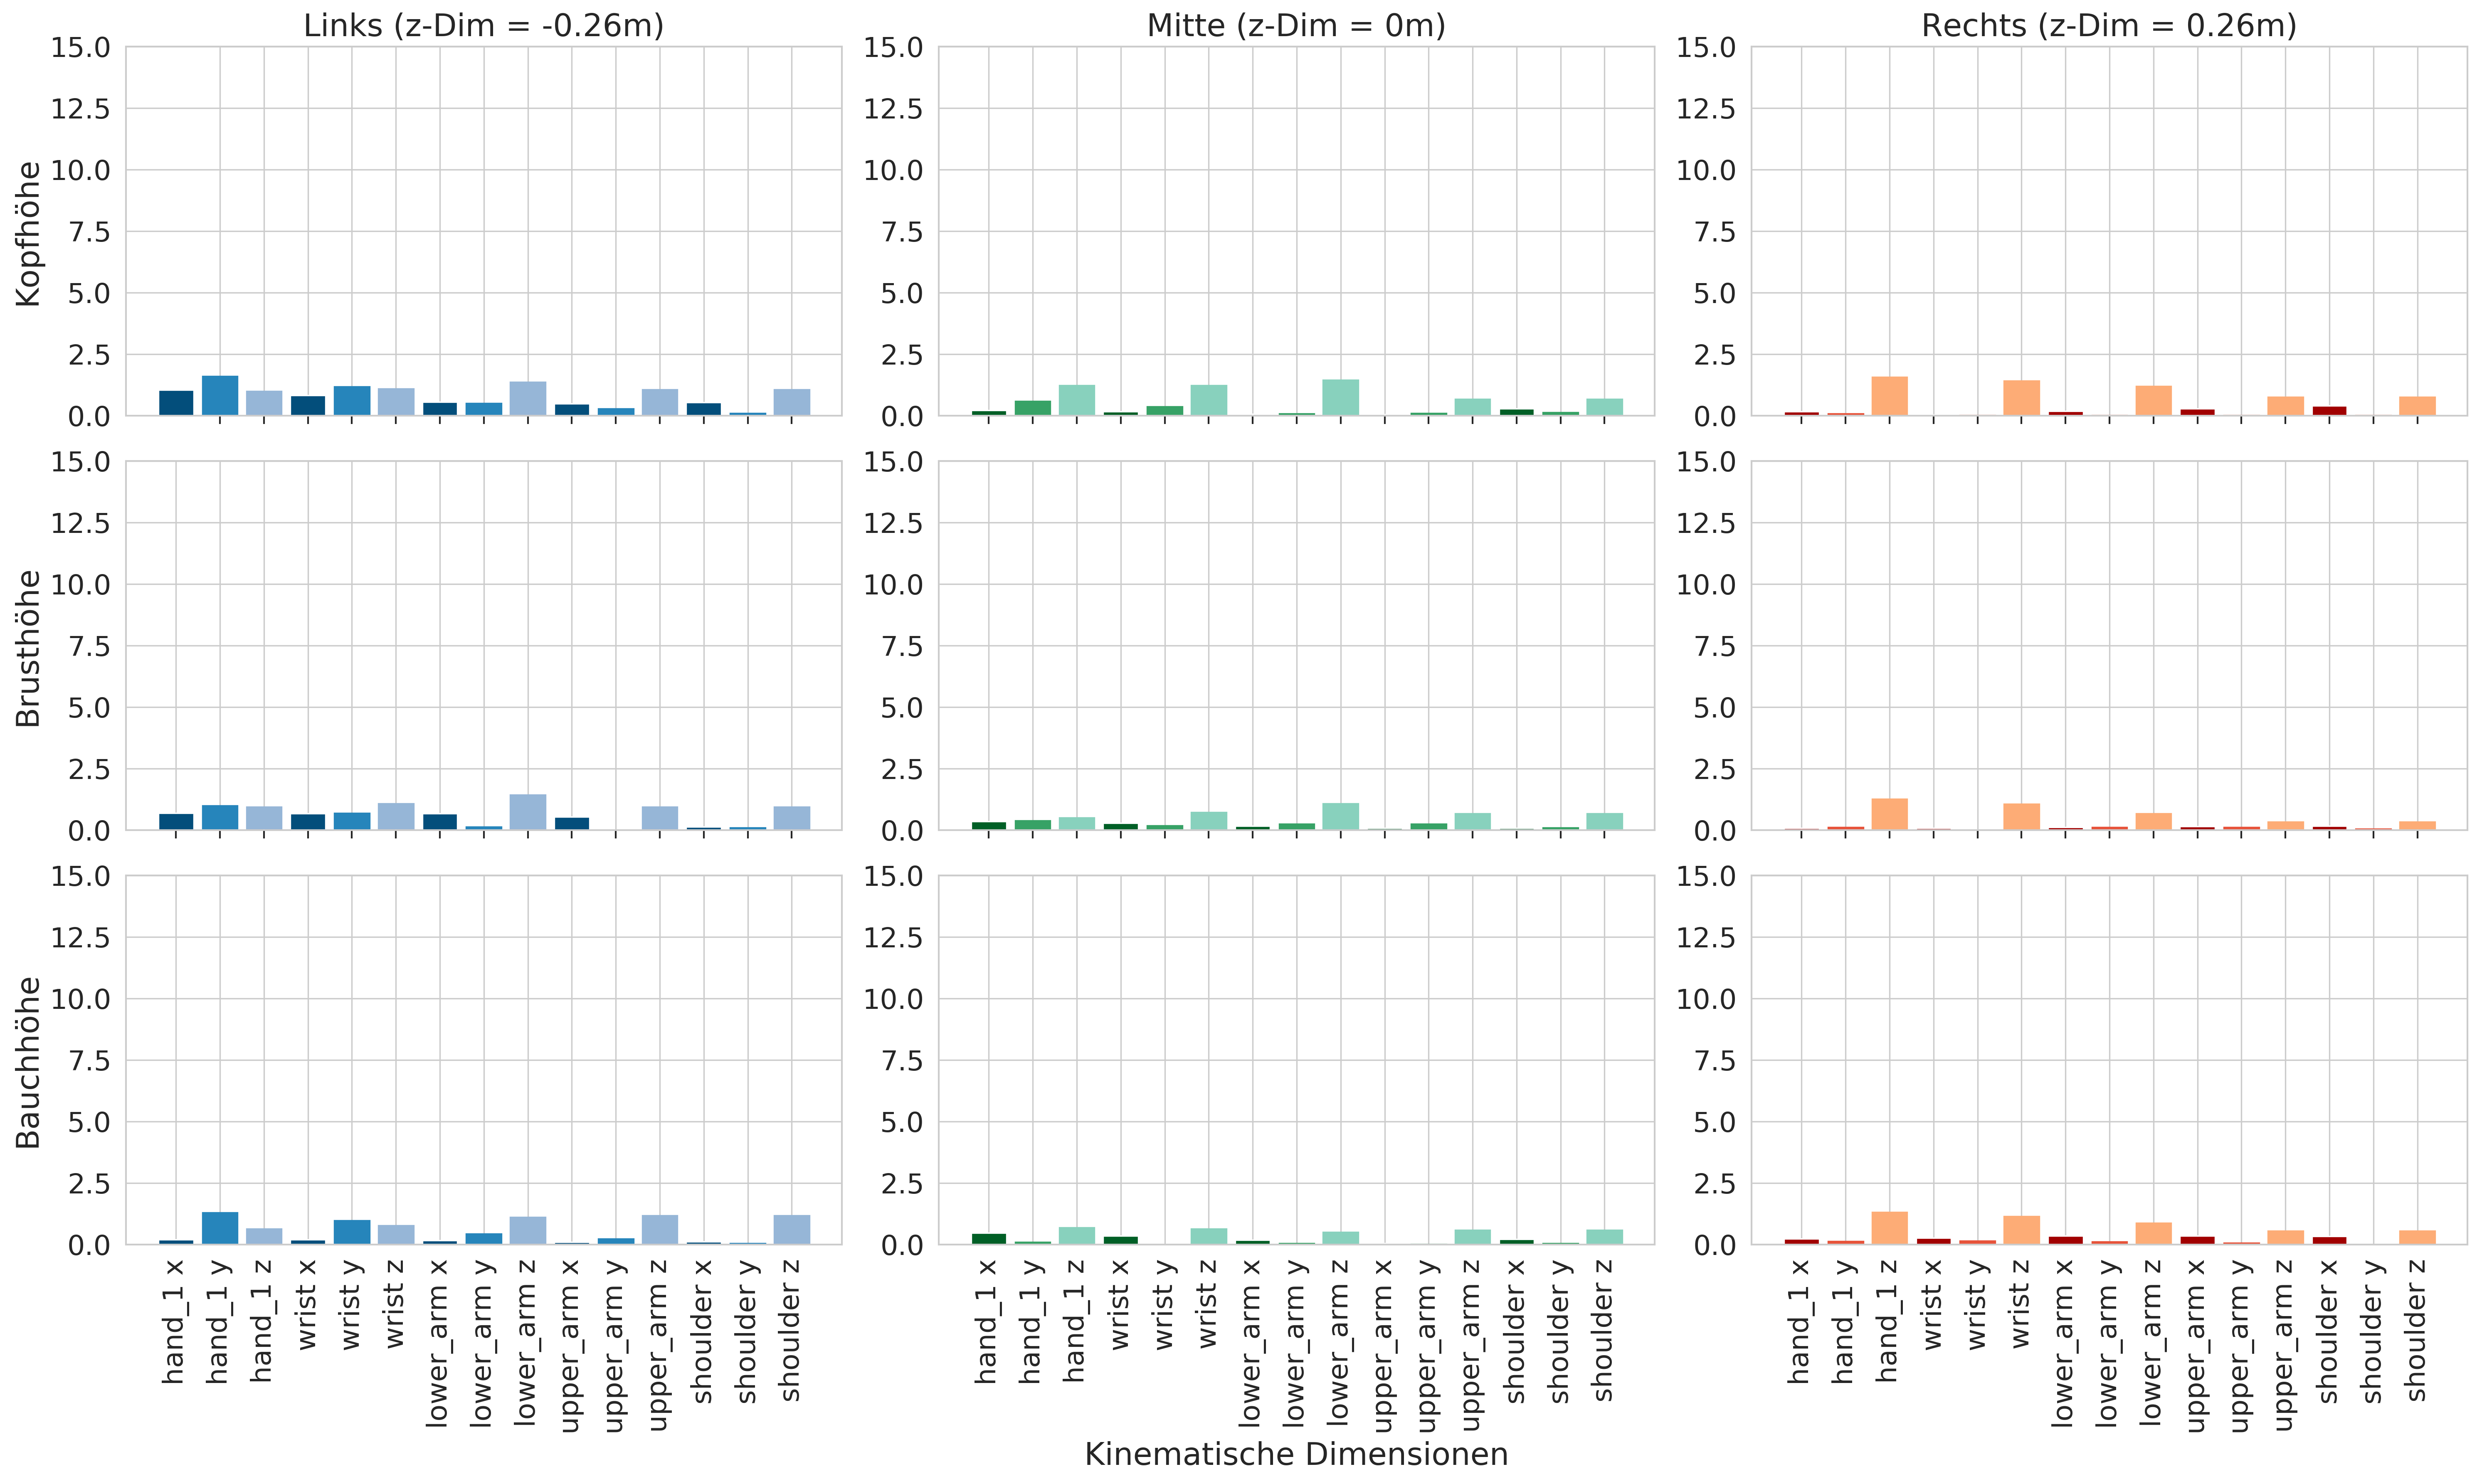

Subject Done!!
sub-01
/home/michael/Desktop/model_evd/1H/sub-01/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-01/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

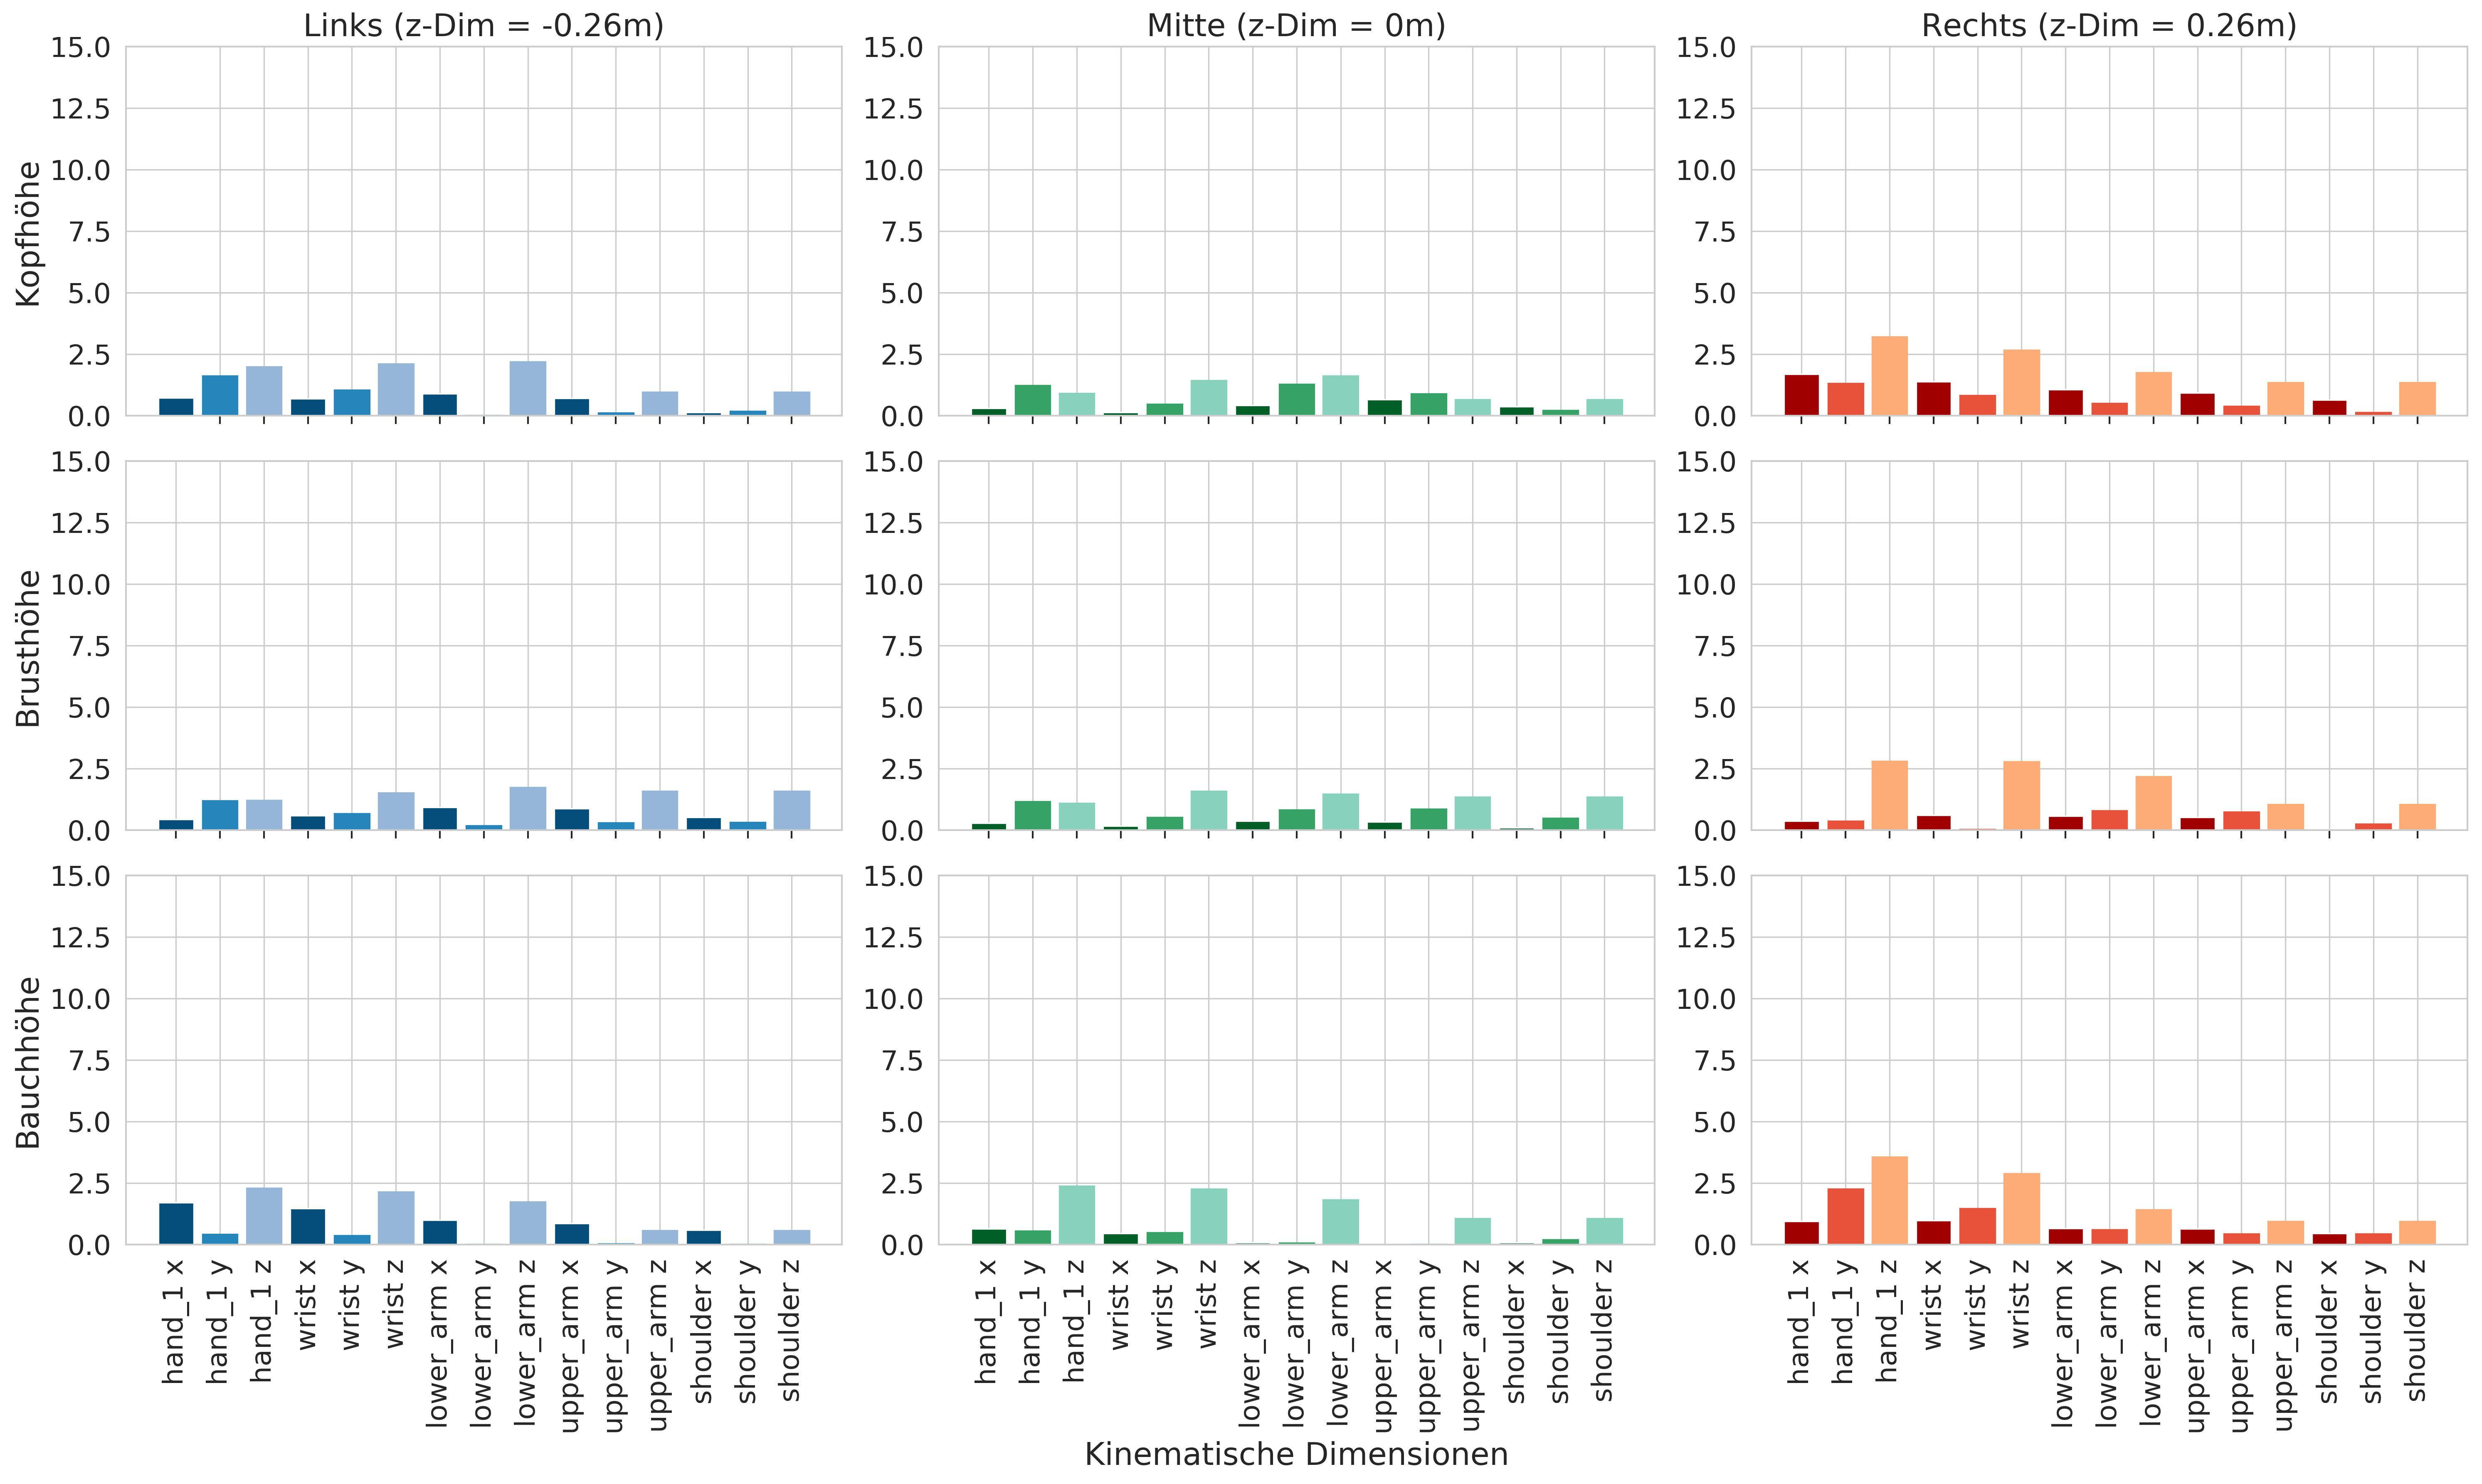

Subject Done!!
sub-05
/home/michael/Desktop/model_evd/1H/sub-05/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-05/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

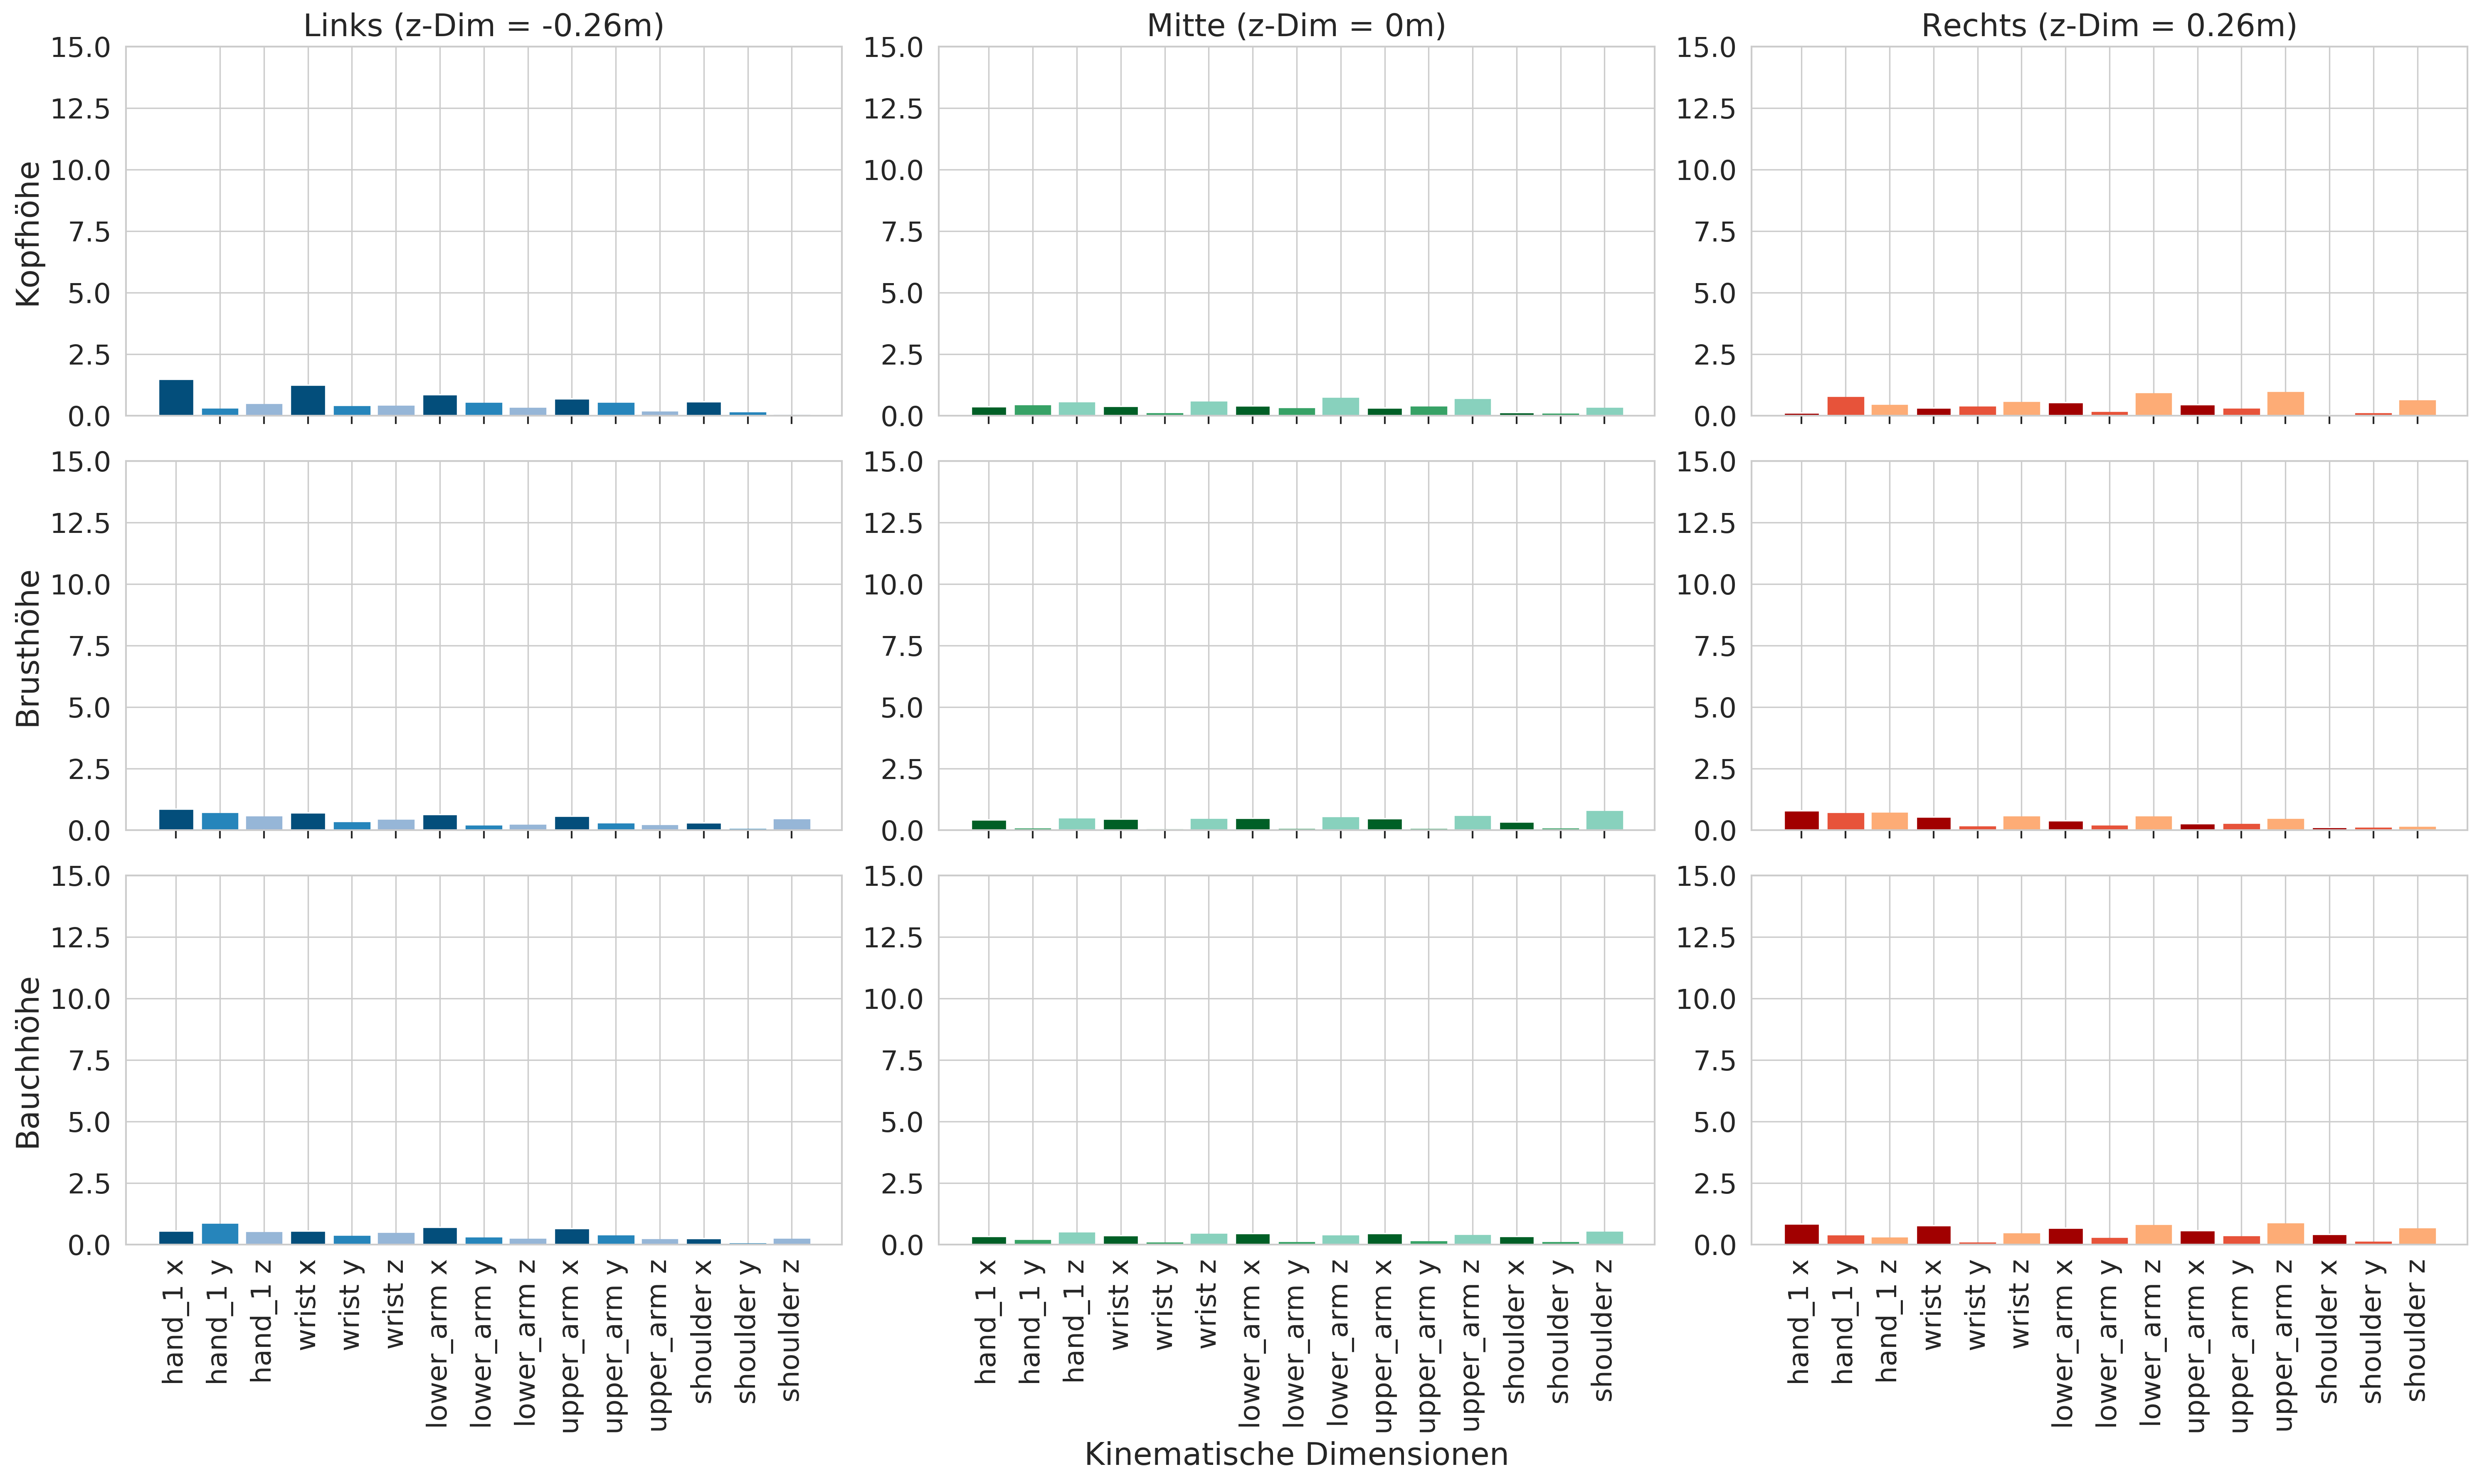

Subject Done!!
sub-06
/home/michael/Desktop/model_evd/1H/sub-06/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-06/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

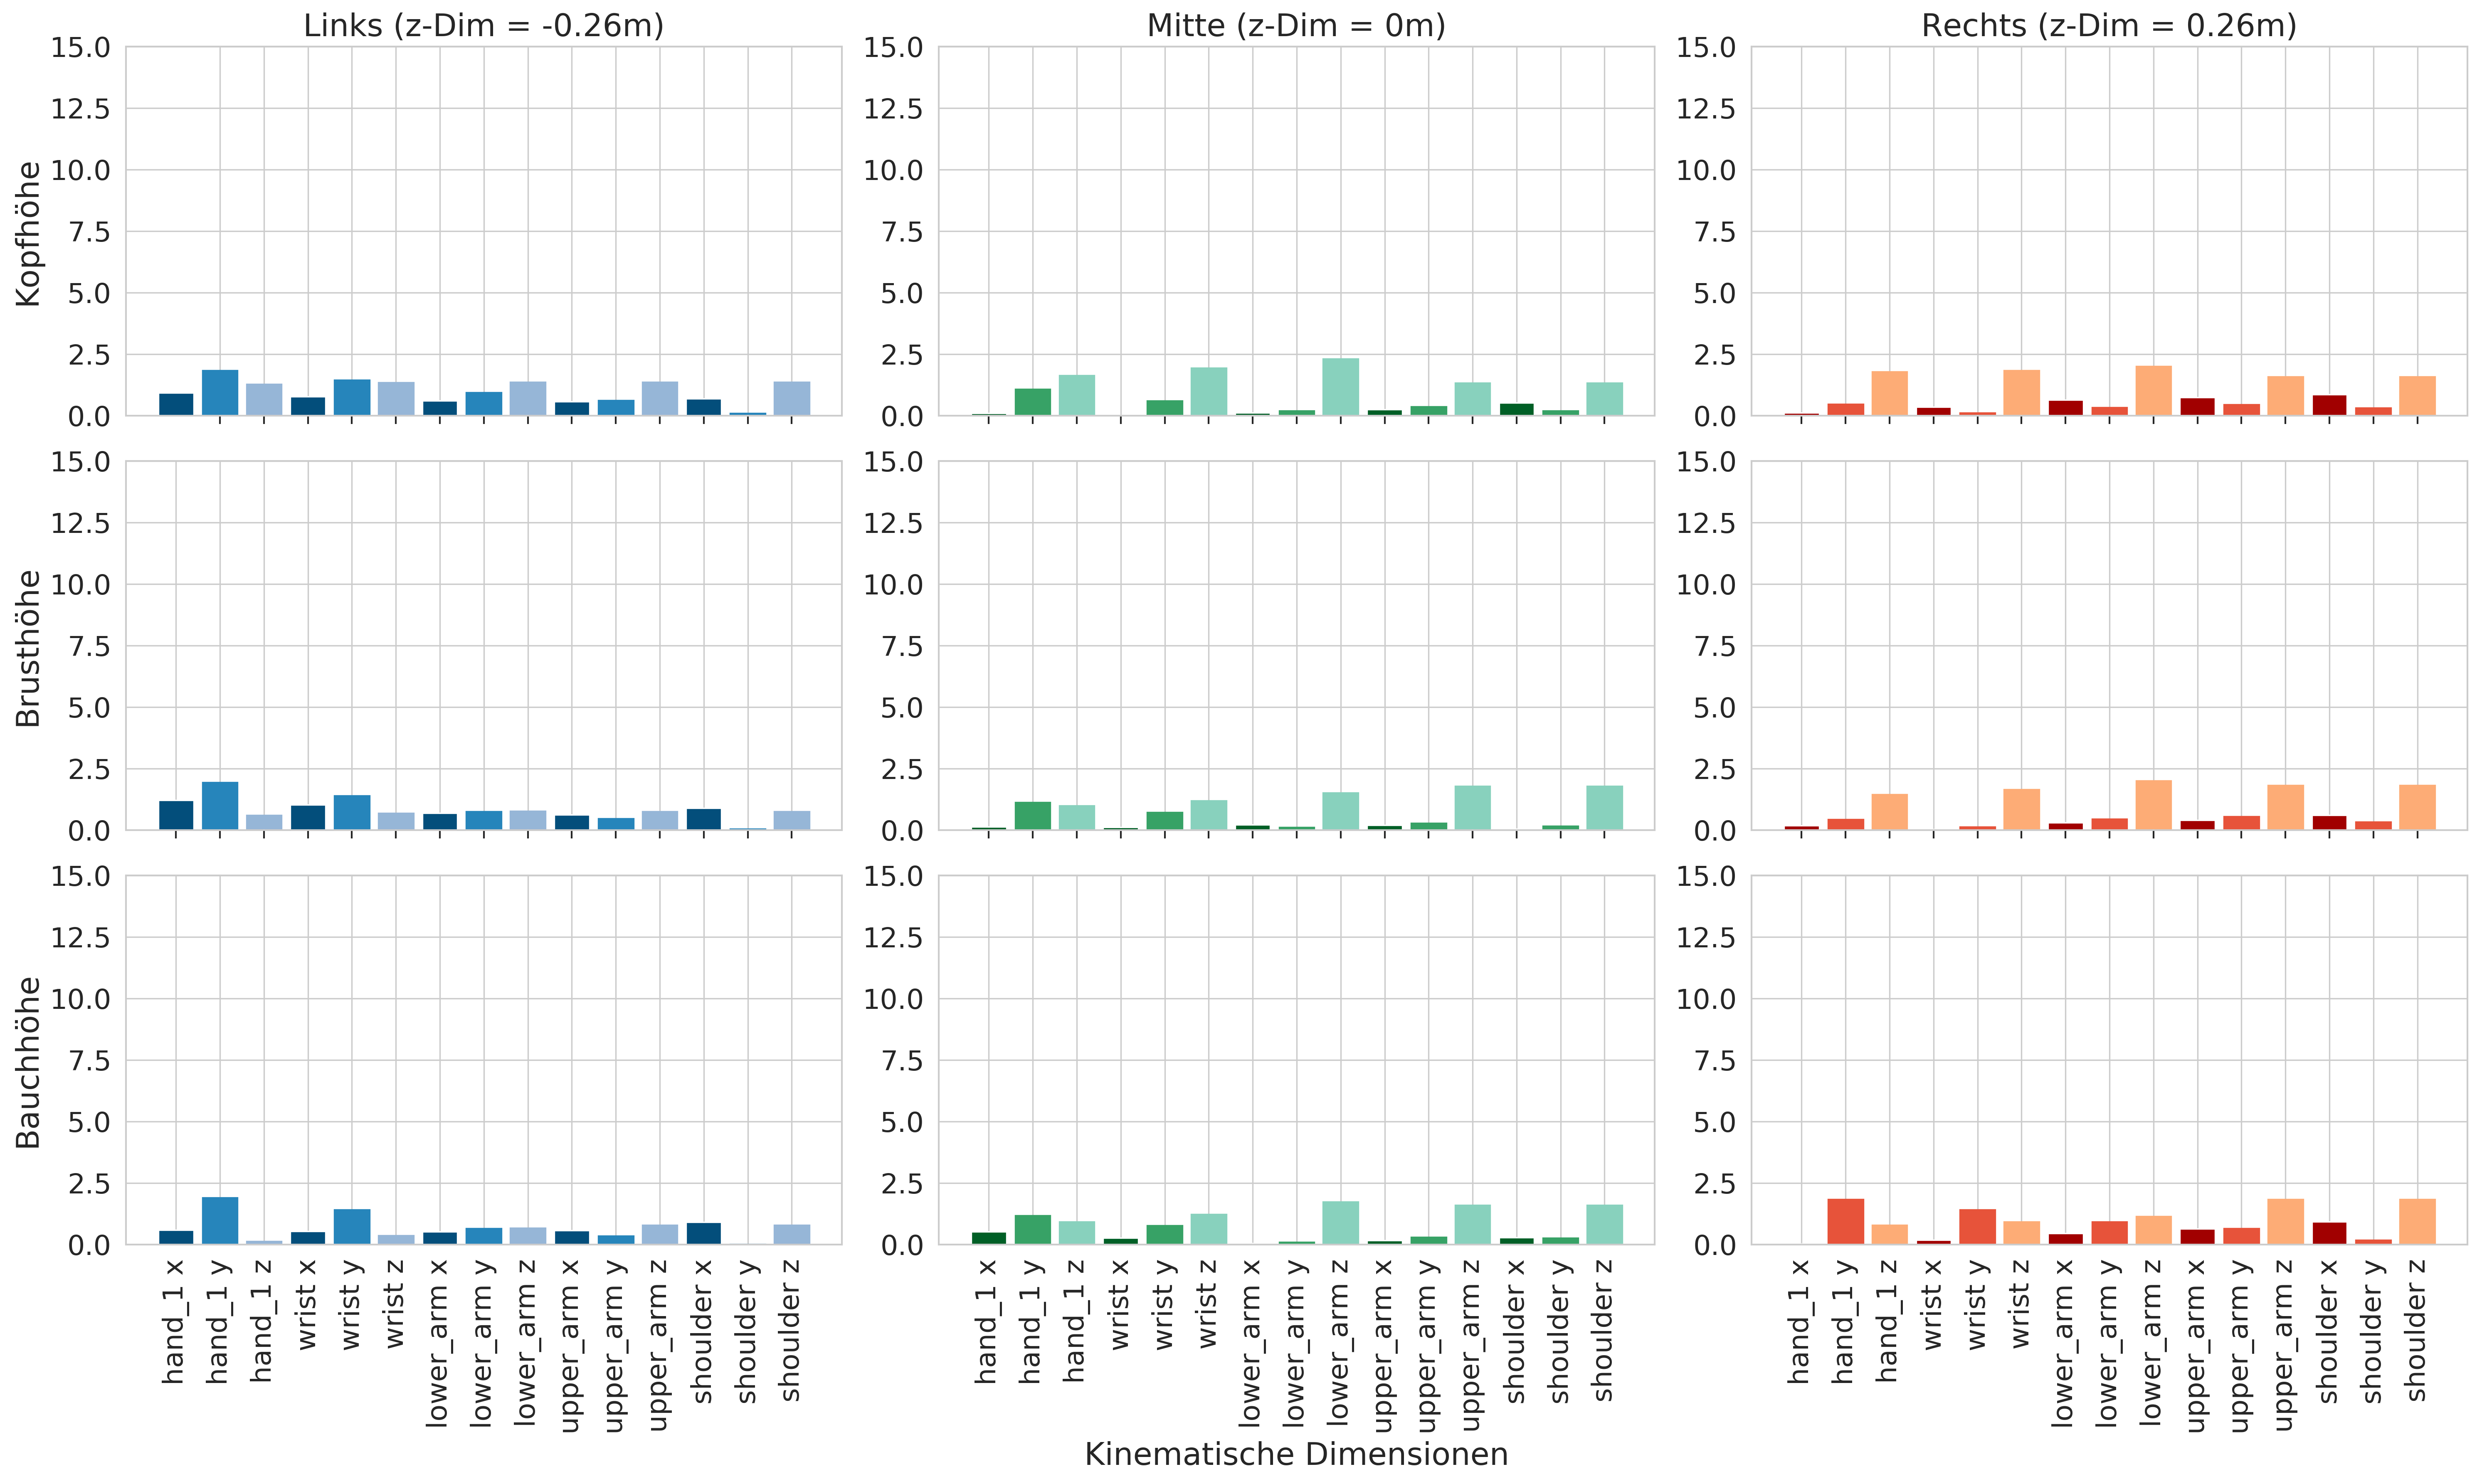

Subject Done!!
sub-12
/home/michael/Desktop/model_evd/1H/sub-12/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-12/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

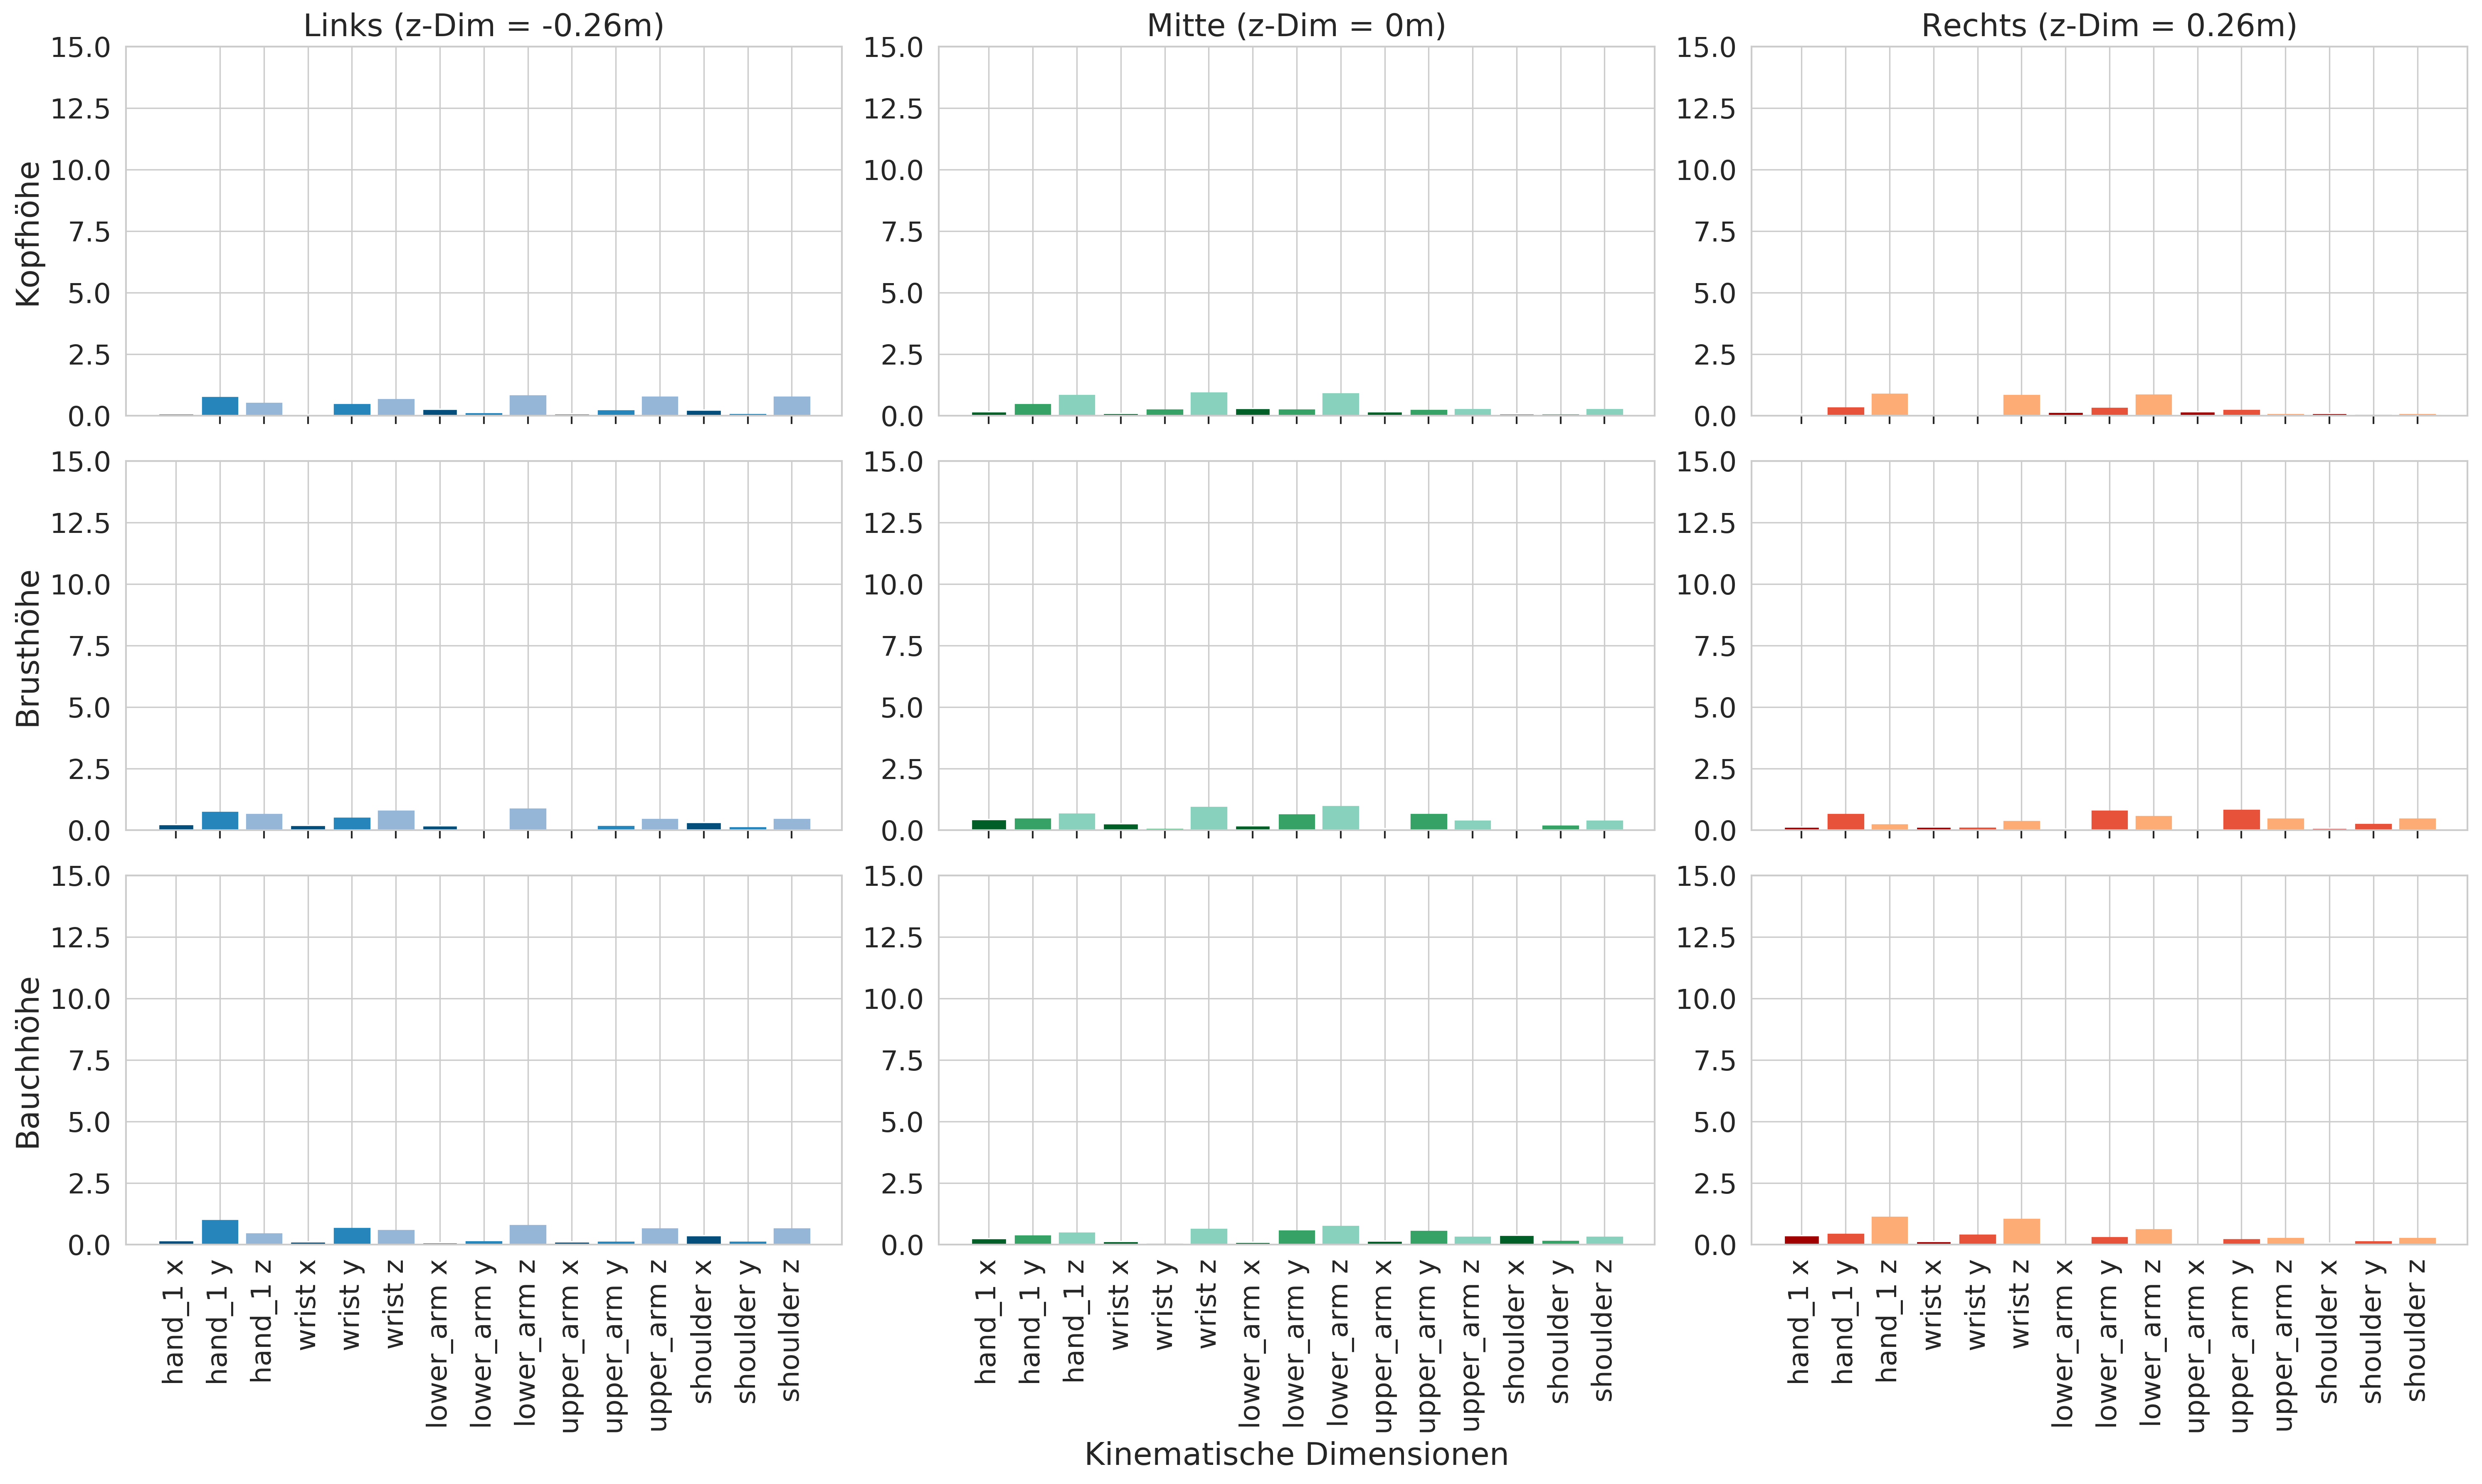

Subject Done!!
sub-04
/home/michael/Desktop/model_evd/1H/sub-04/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-04/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

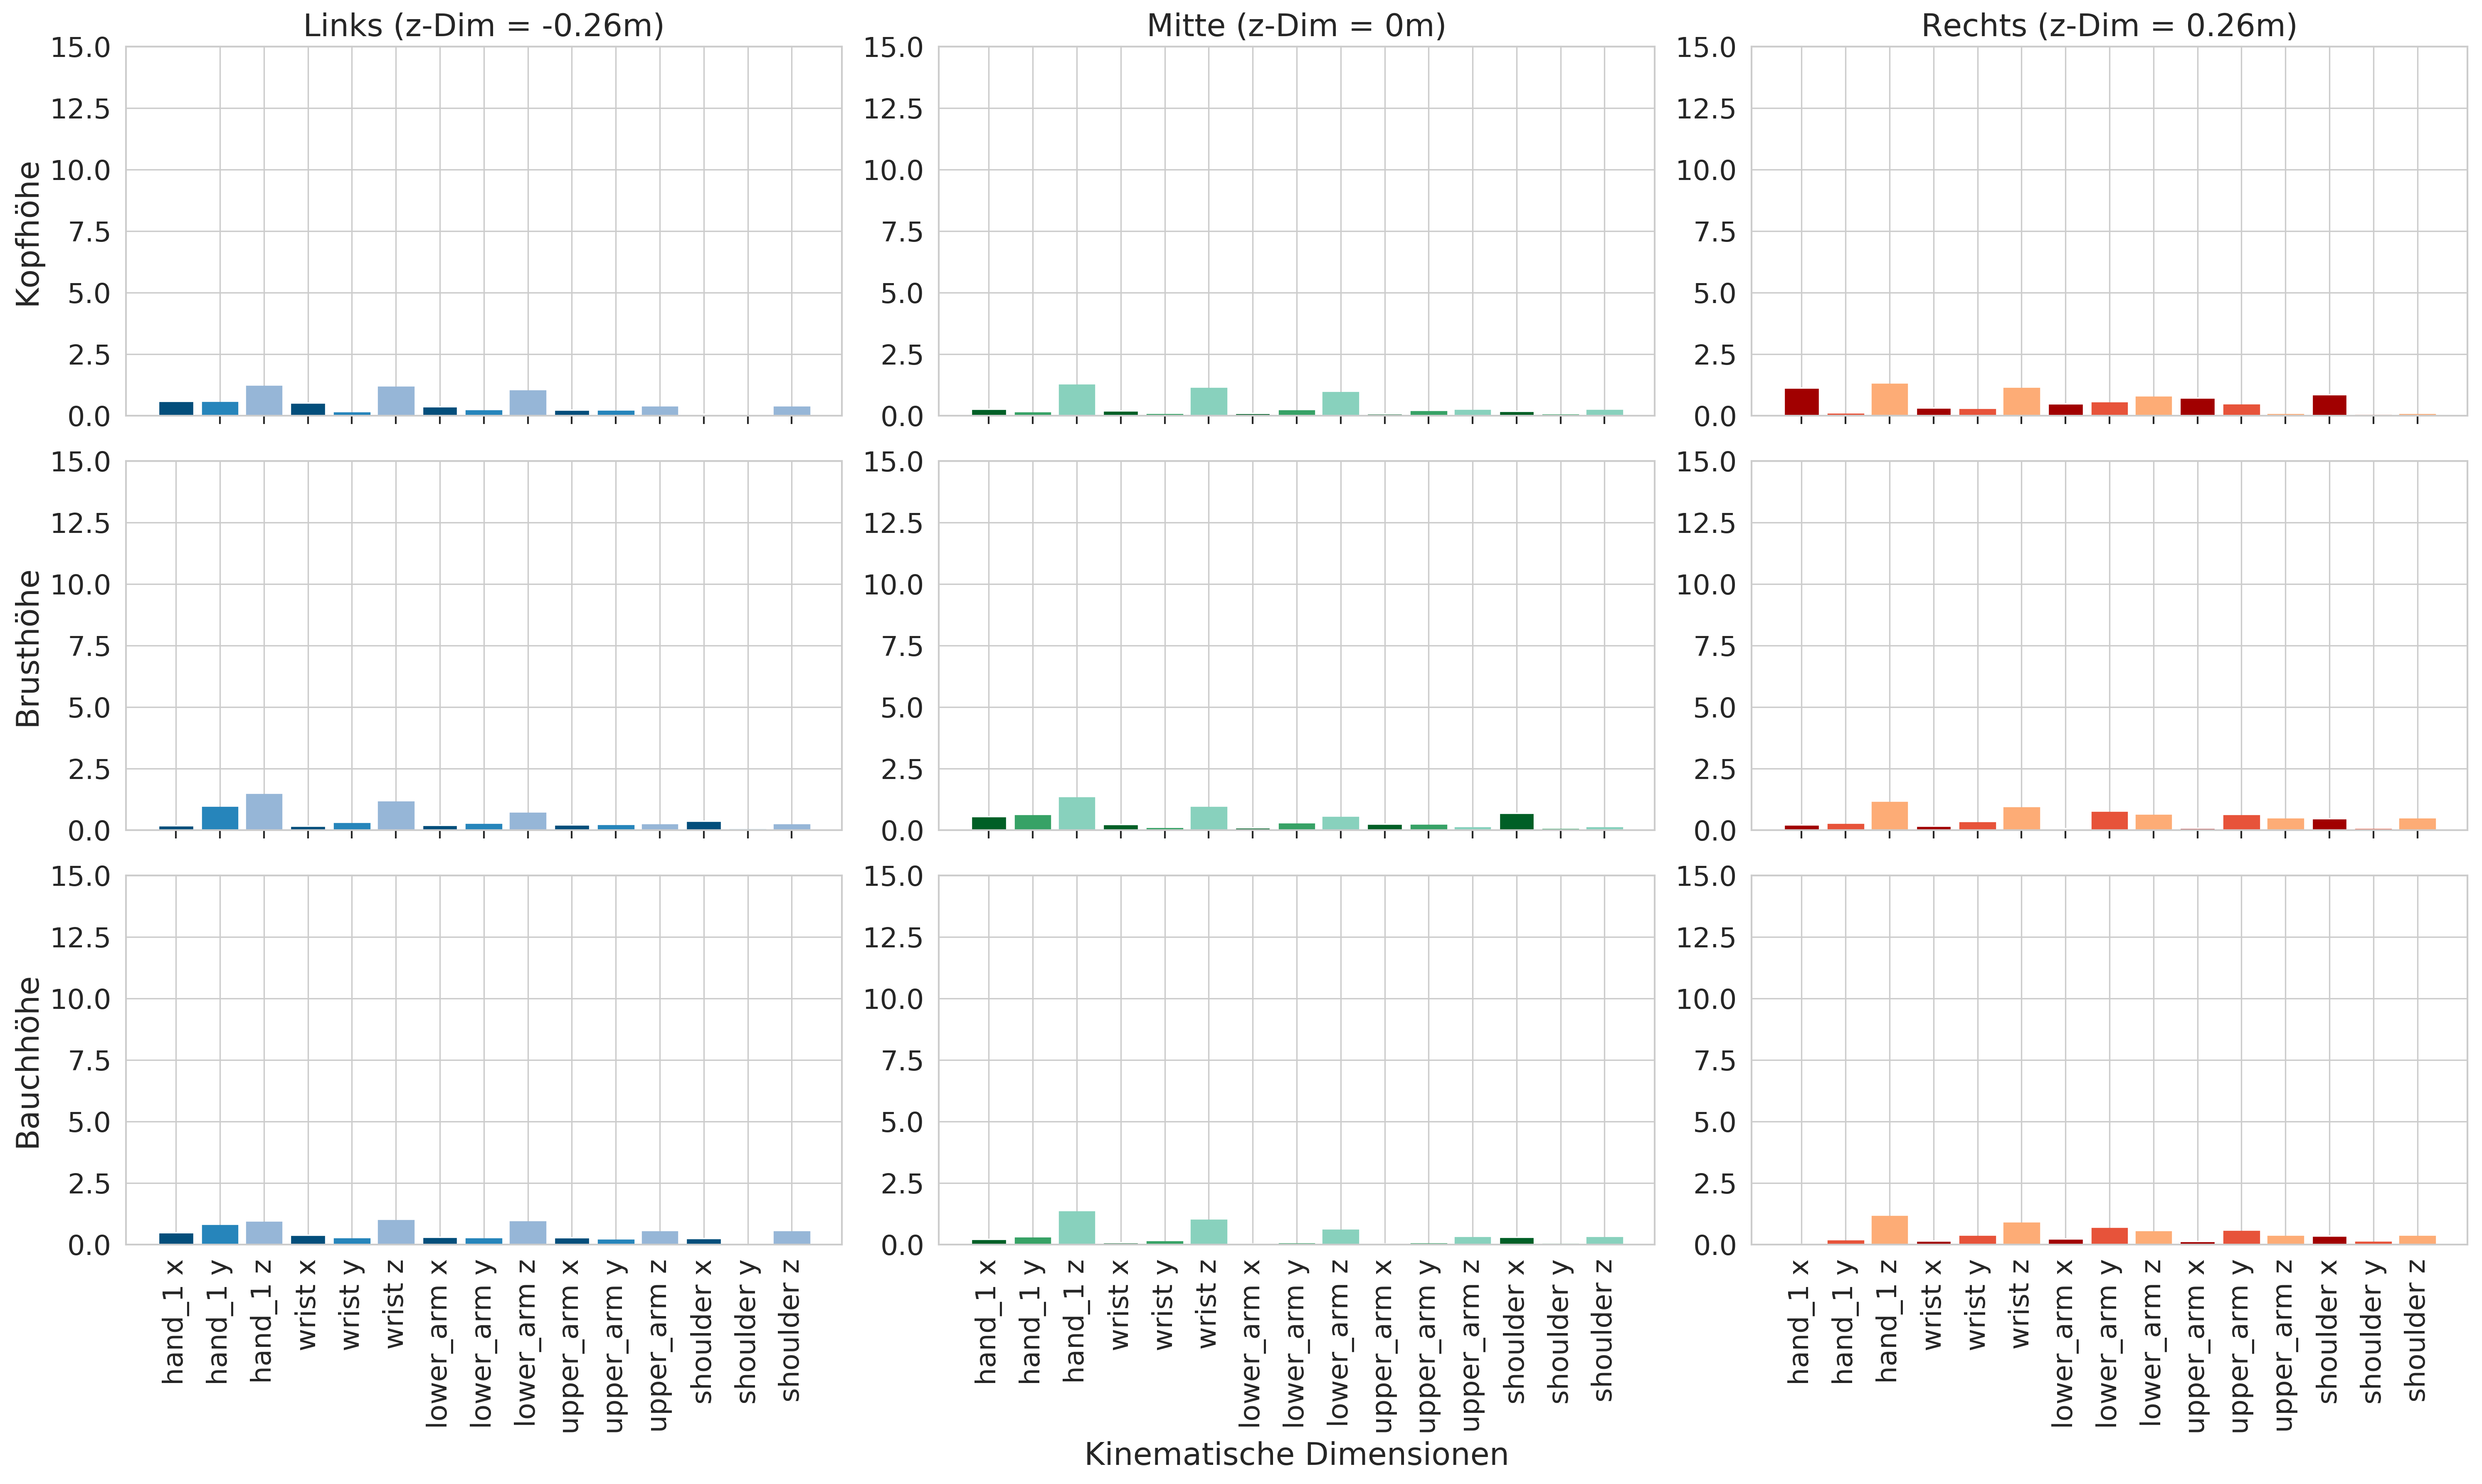

Subject Done!!
sub-09
/home/michael/Desktop/model_evd/1H/sub-09/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-09/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

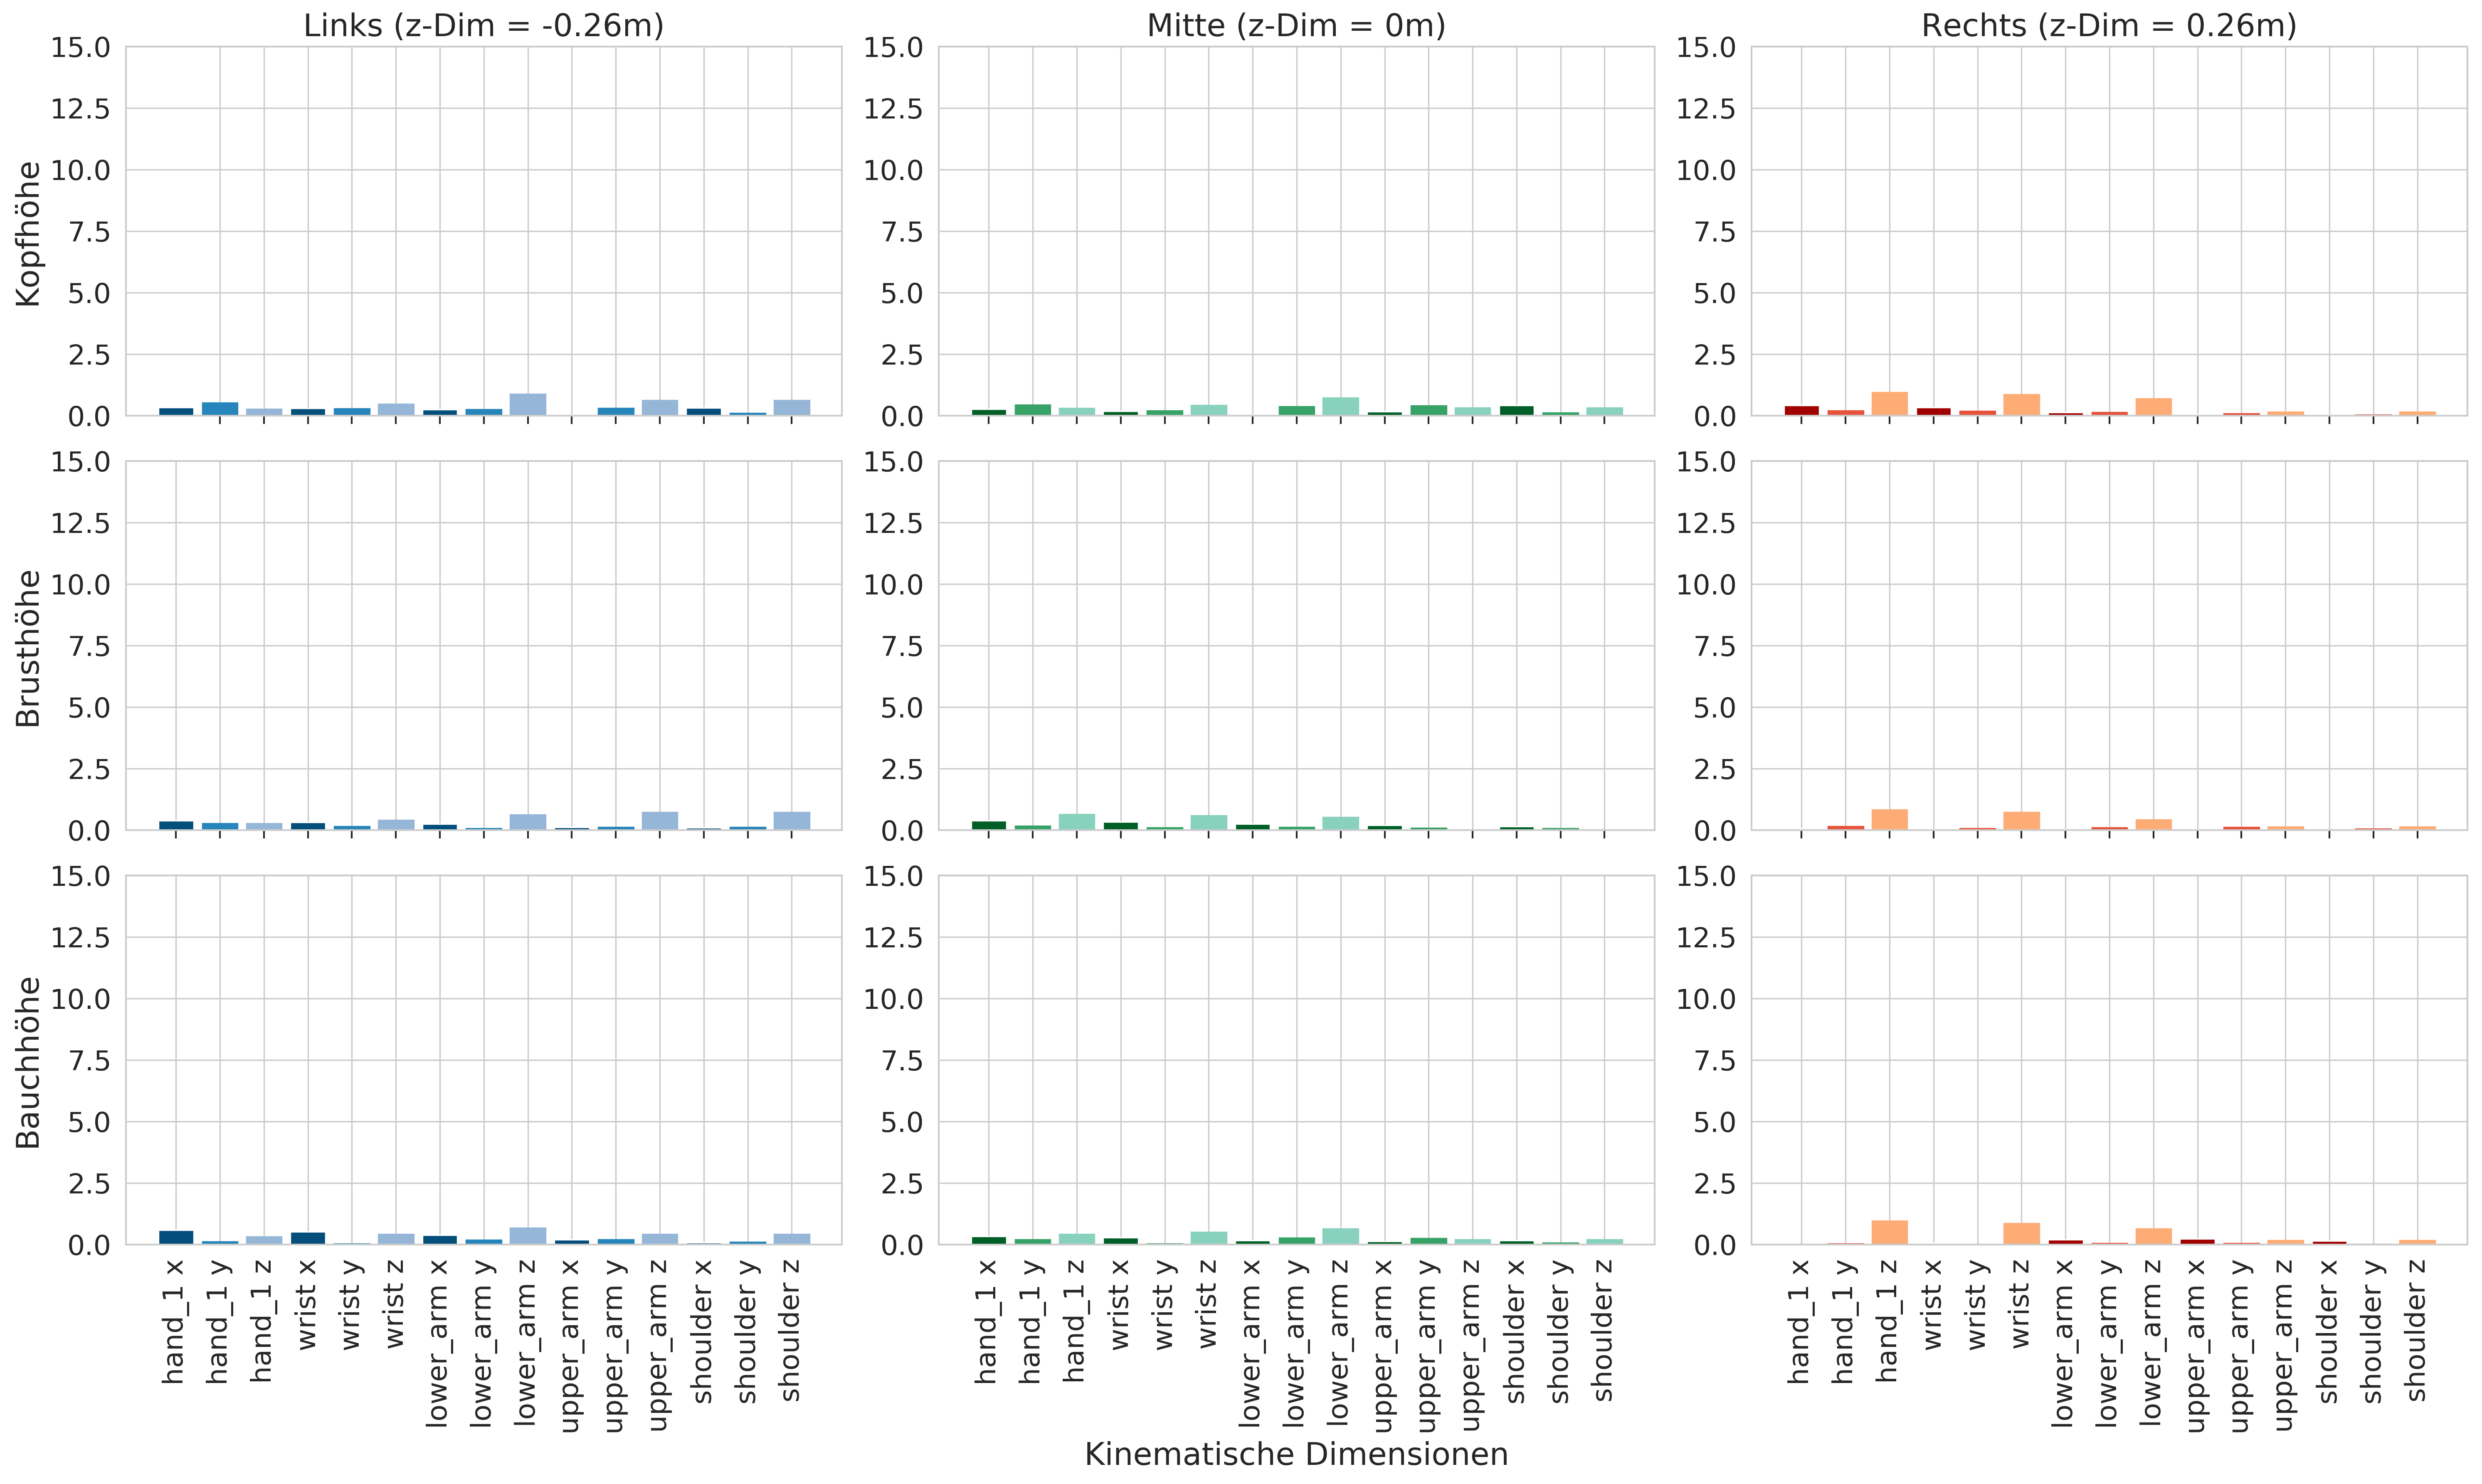

Subject Done!!
sub-03
/home/michael/Desktop/model_evd/1H/sub-03/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-03/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

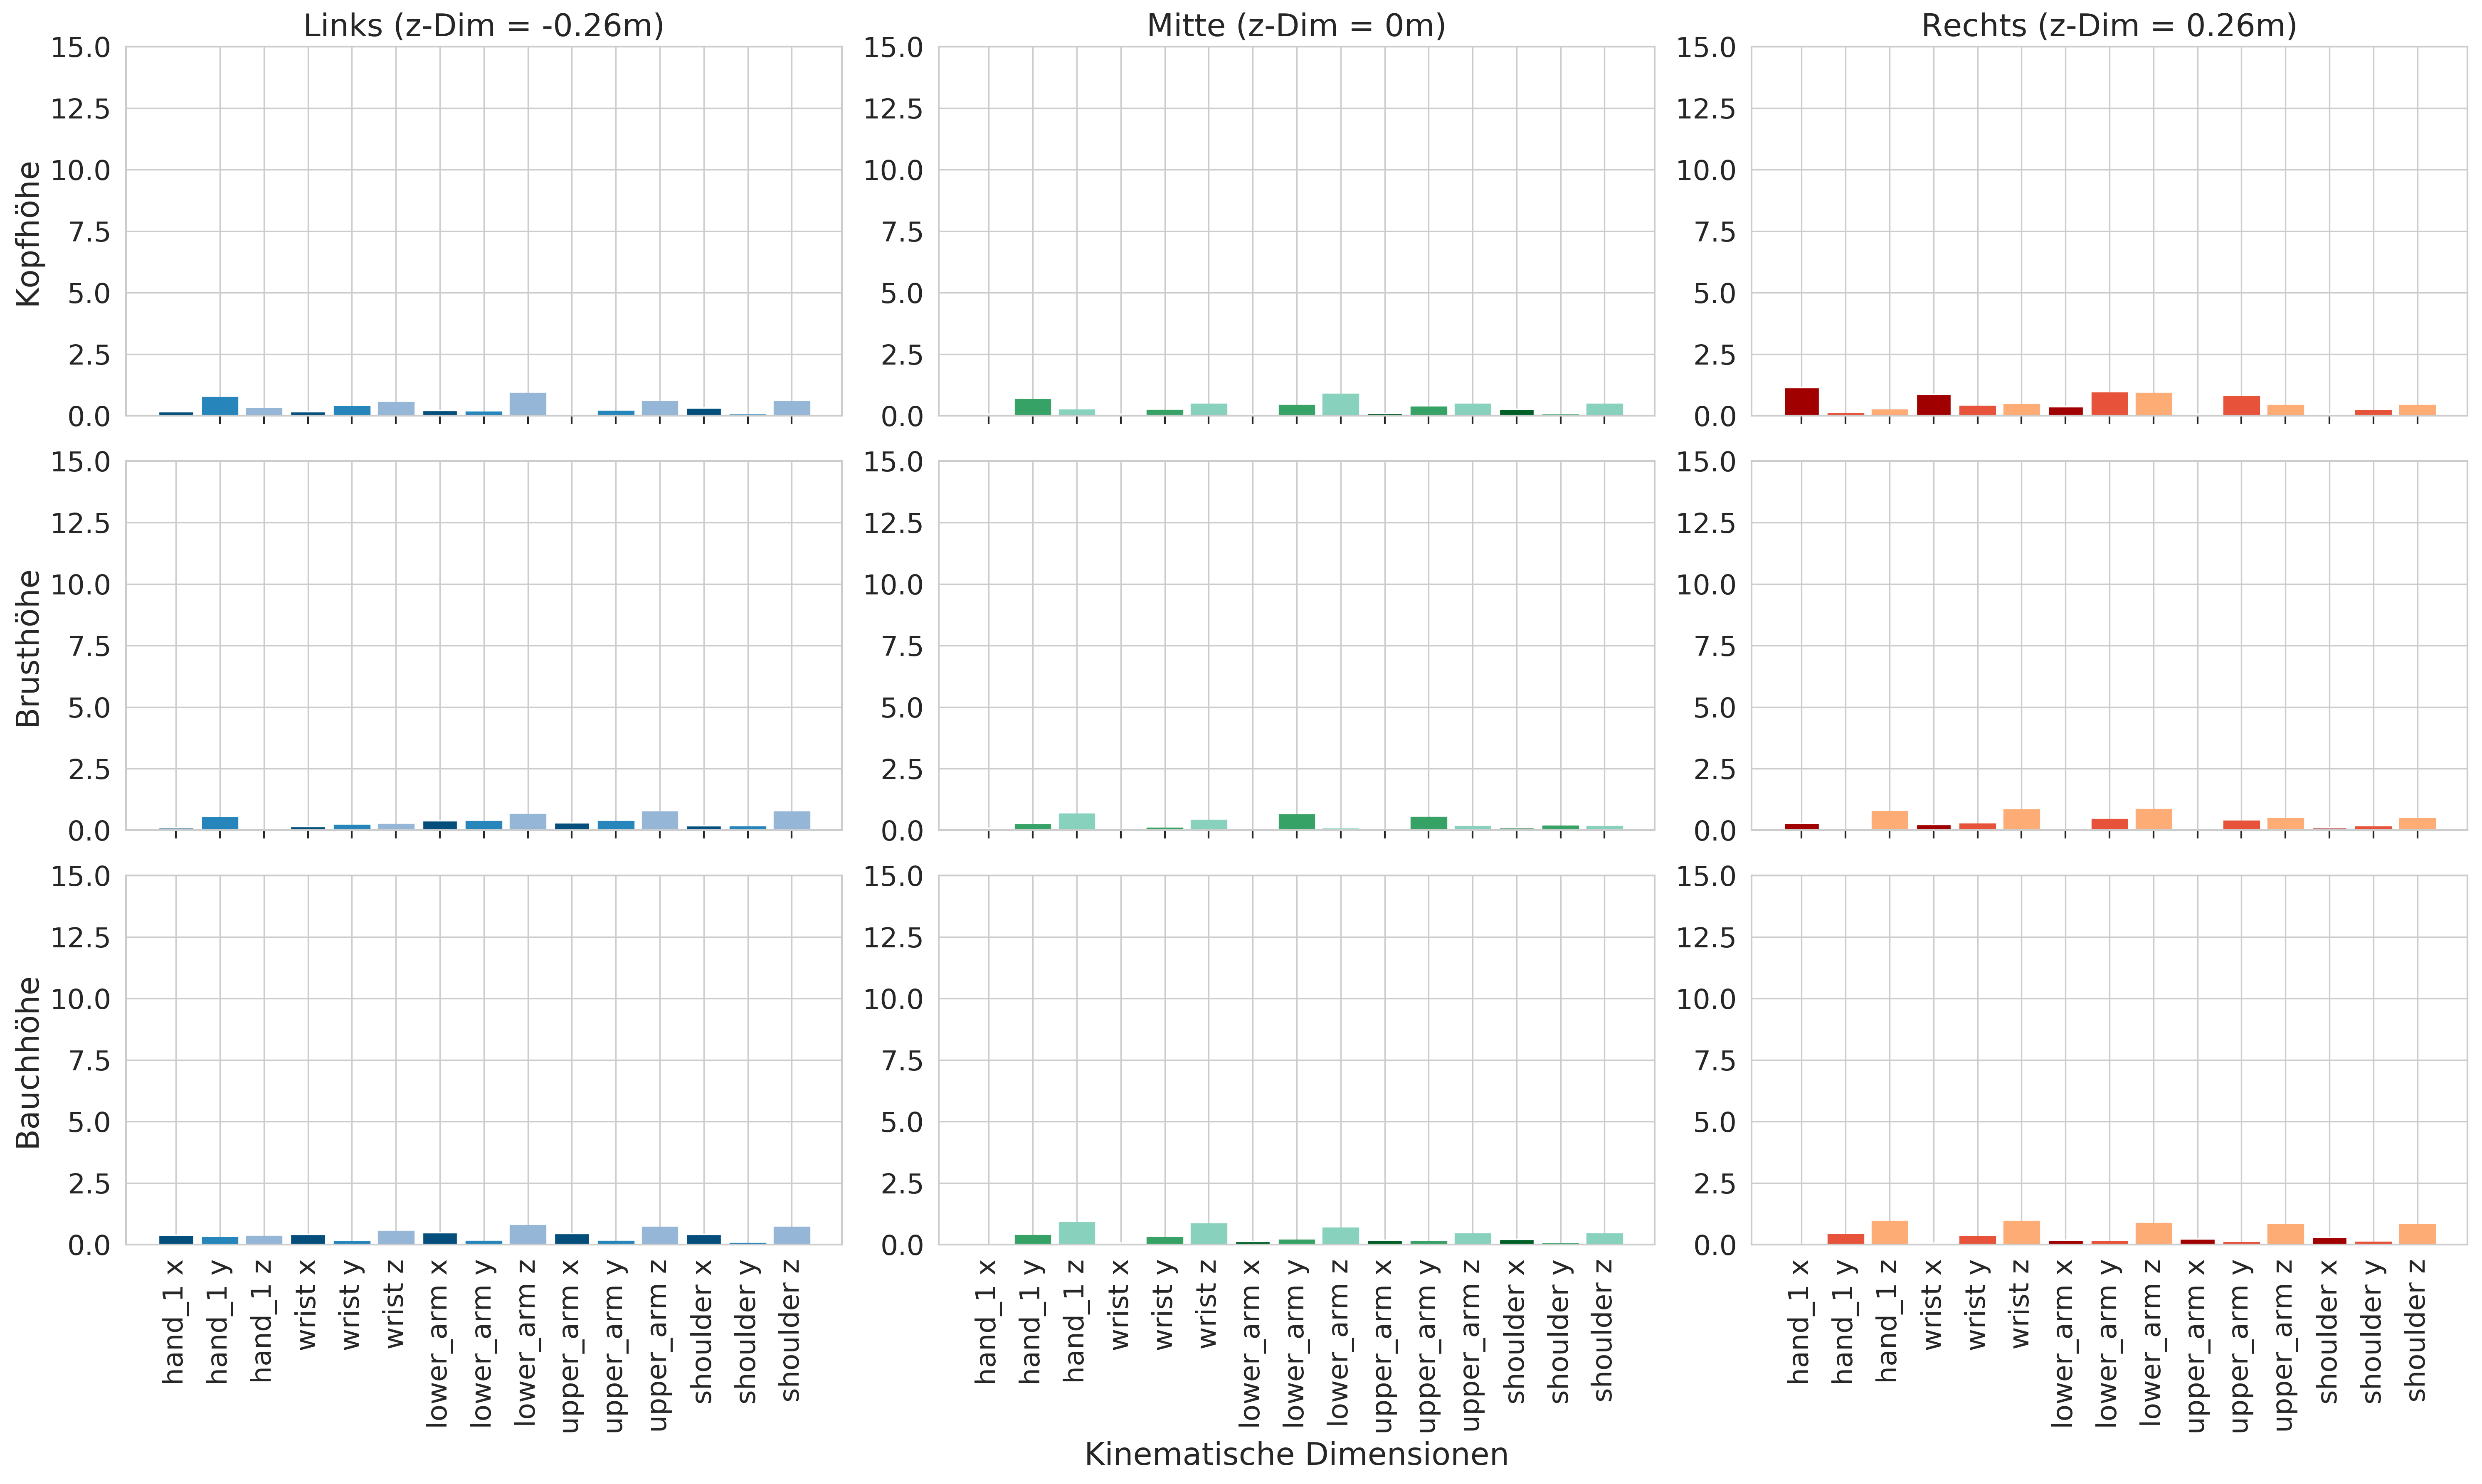

Subject Done!!
group_level
/home/michael/Desktop/model_evd/1H/group_level/pcs
pcs
/home/michael/Desktop/model_evd/1H/group_level/vaf
vaf
/home/michael/Desktop/model_evd/1H/group_level/vts
vts
/home/michael/Desktop/model_evd/1H/group_level/me
me


/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

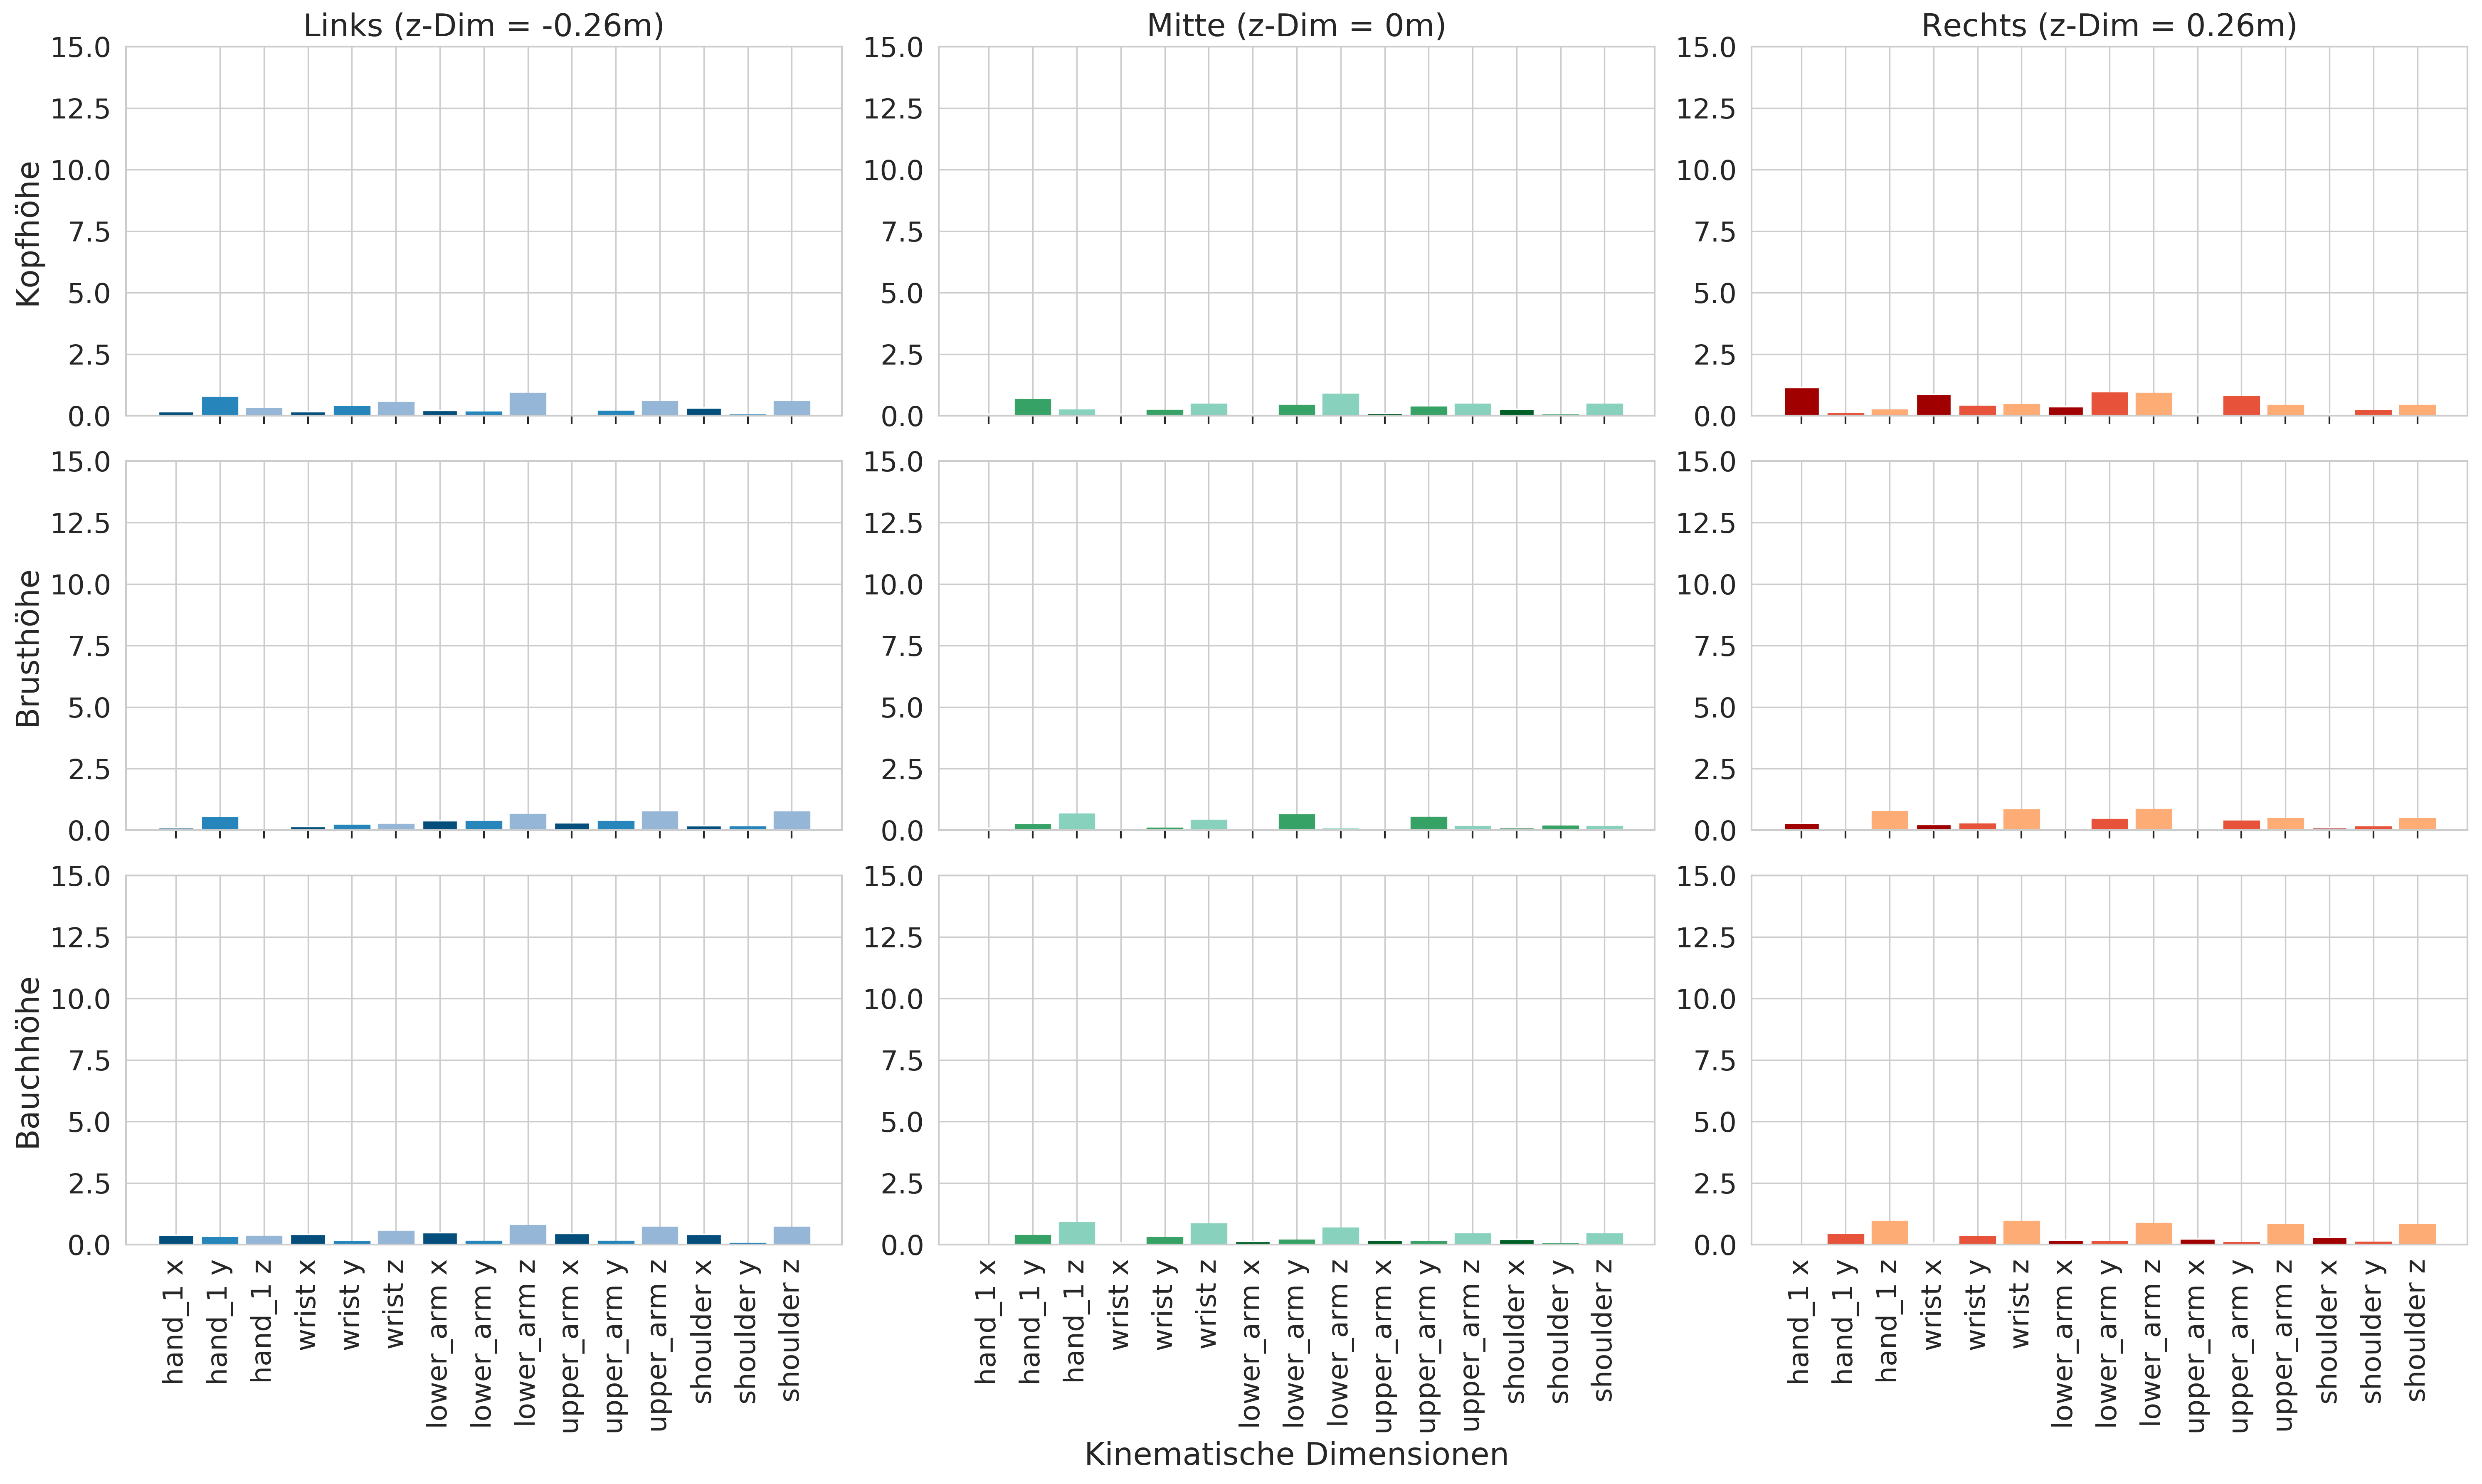

Subject Done!!
sub-08
/home/michael/Desktop/model_evd/1H/sub-08/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-08/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

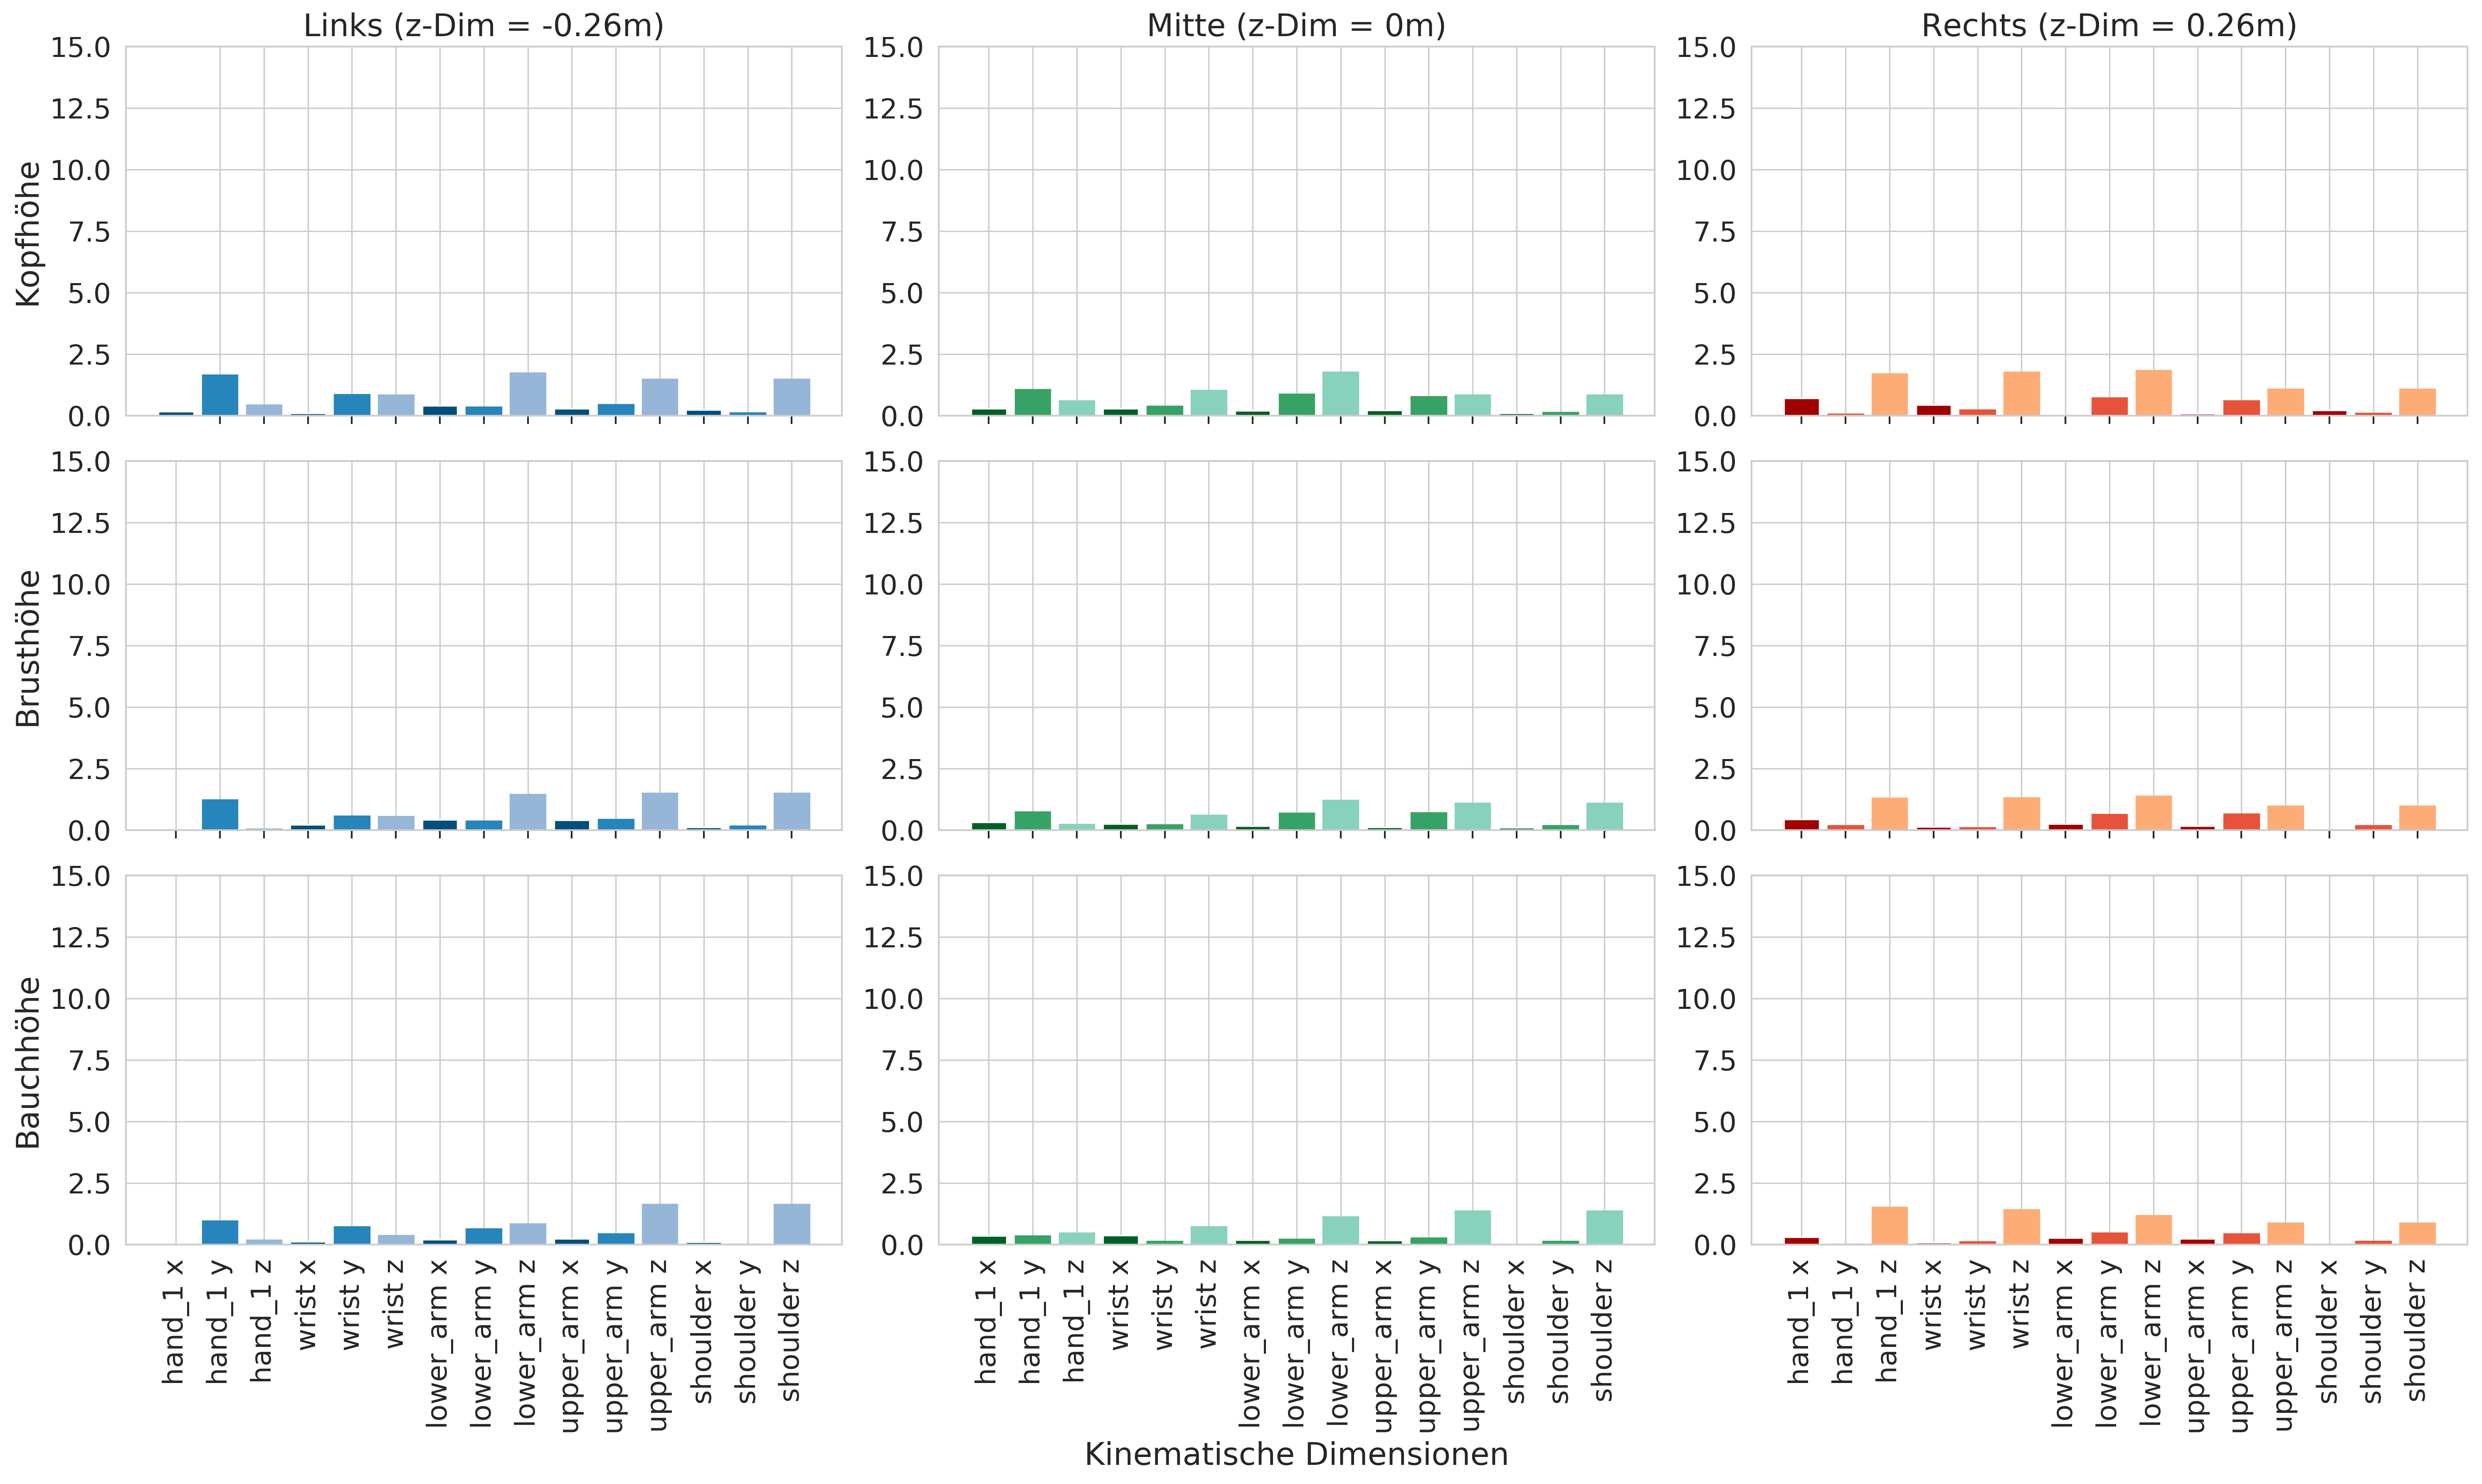

Subject Done!!
sub-11
/home/michael/Desktop/model_evd/1H/sub-11/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-11/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

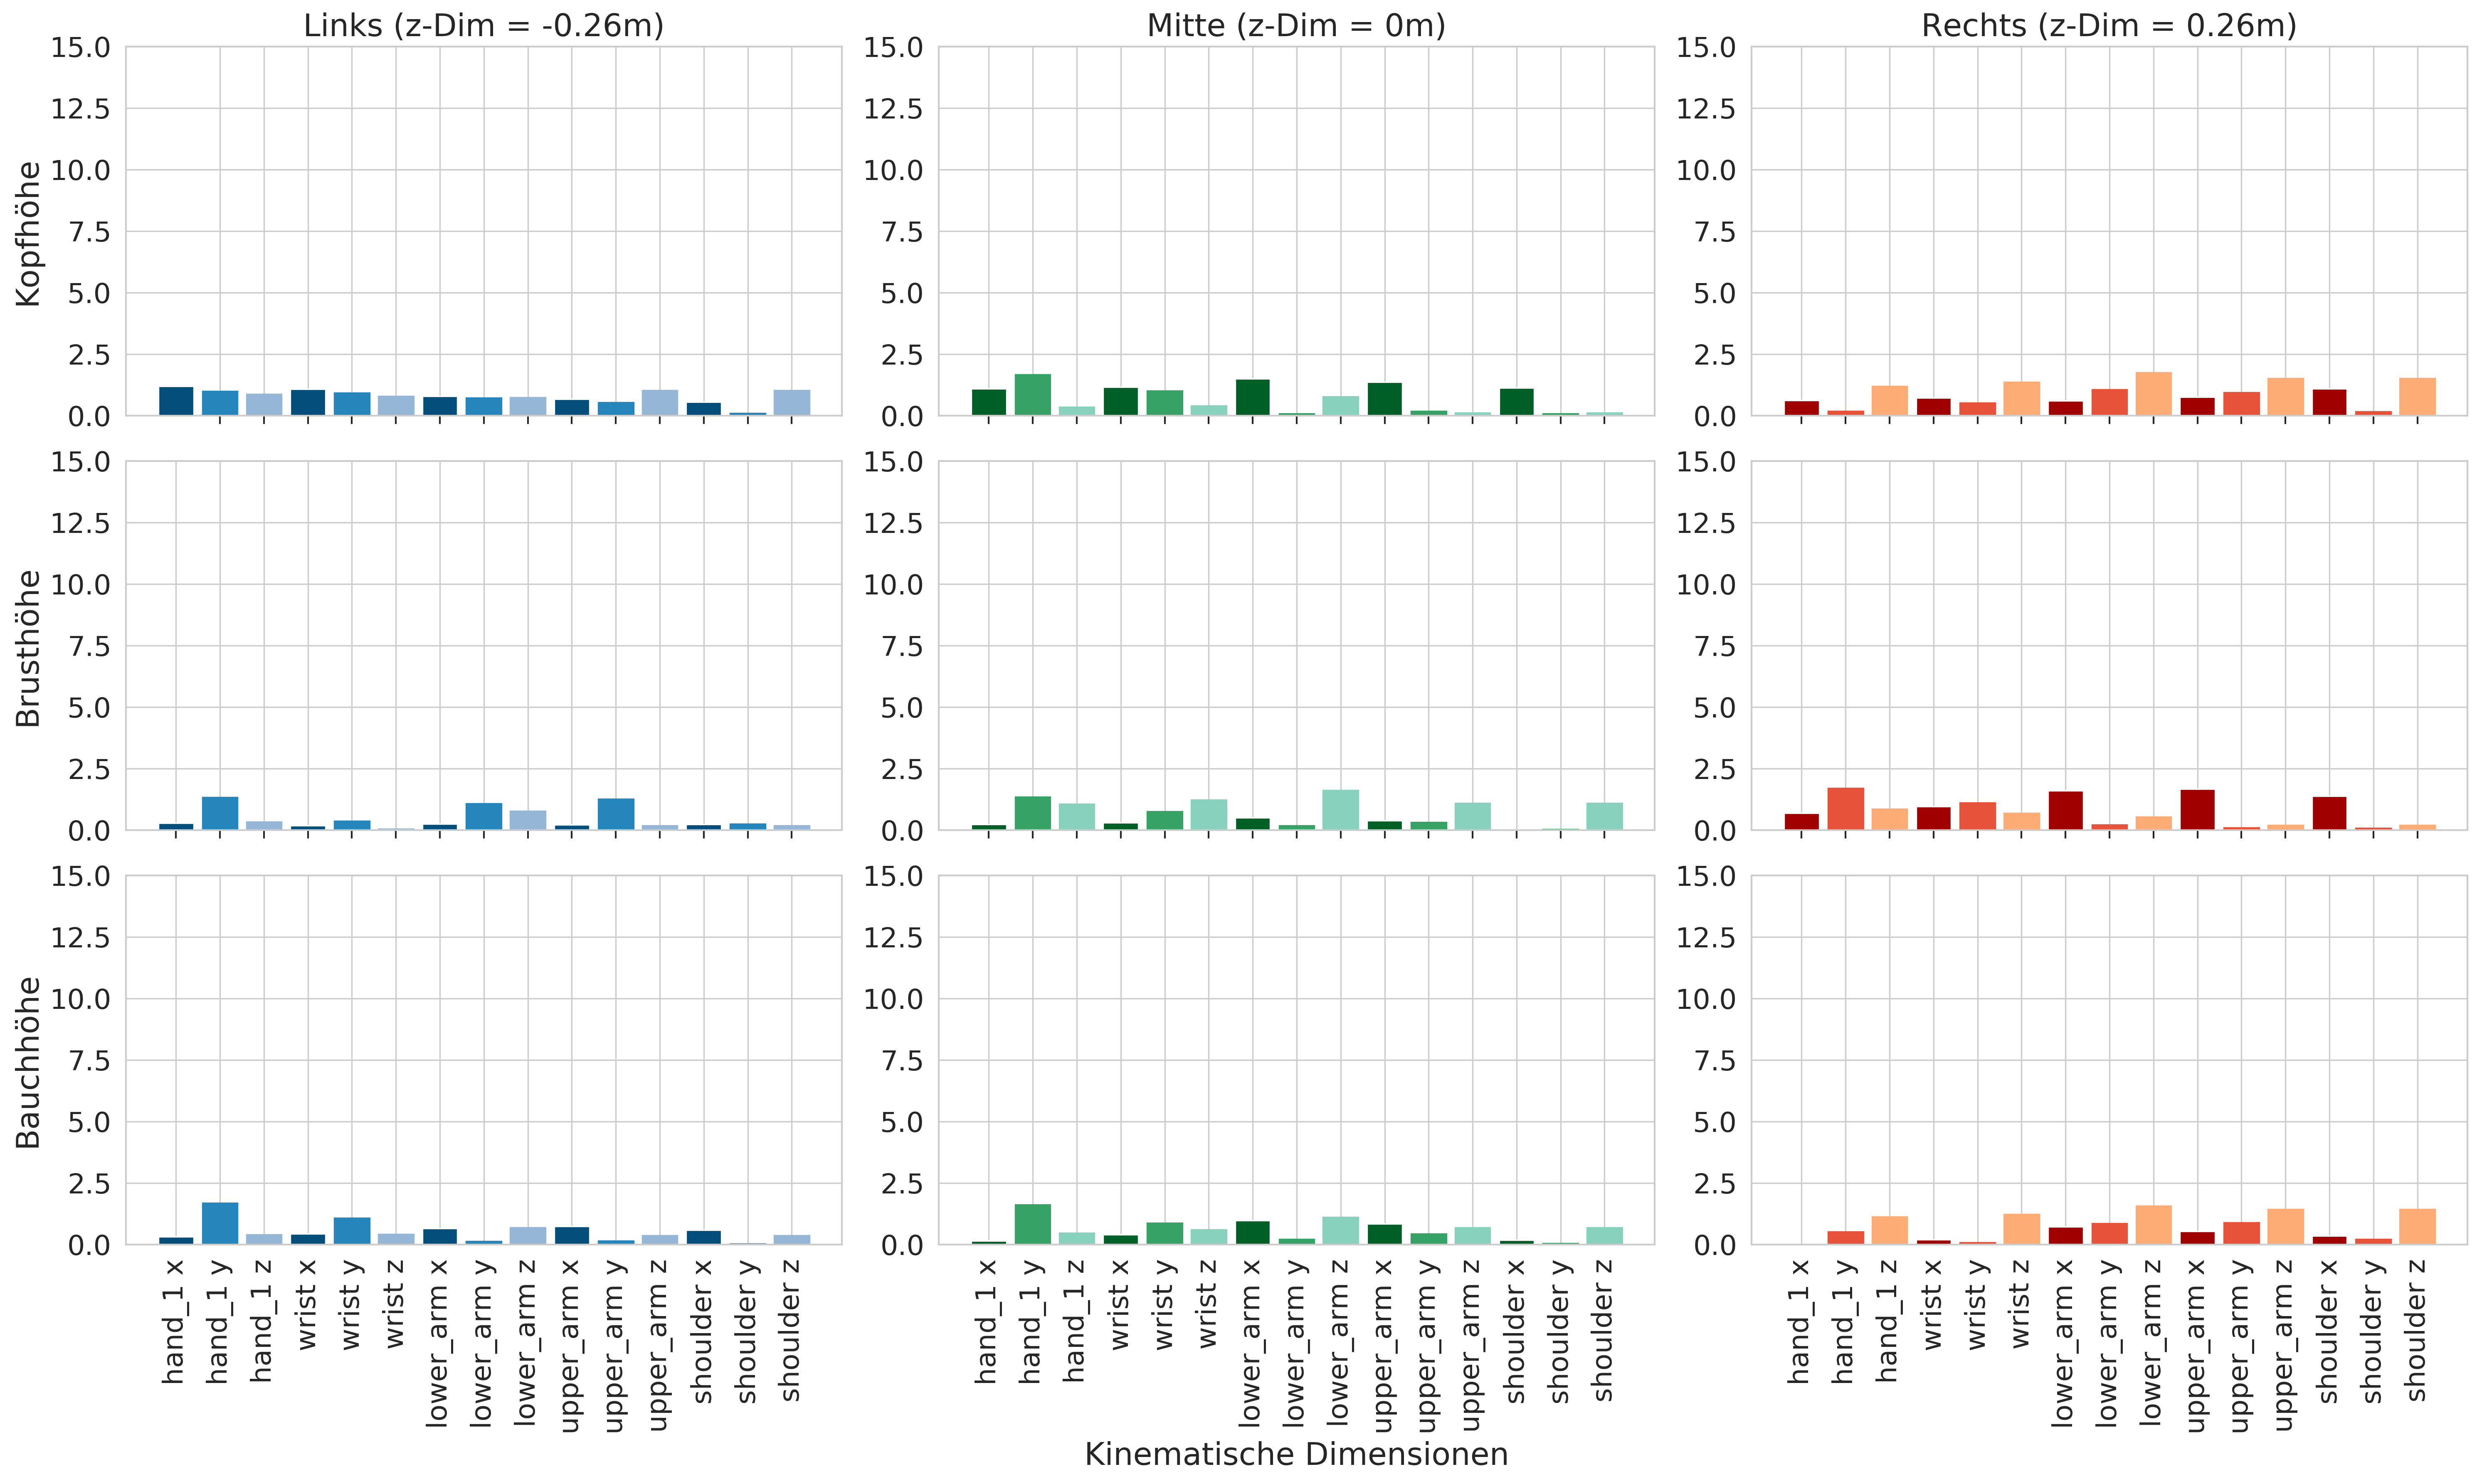

Subject Done!!
sub-10
/home/michael/Desktop/model_evd/1H/sub-10/r1
r1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/m2
m2
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/r3
r3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/l3
l3
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/m1
m1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
/home/michael/Desktop/model_evd/1H/sub-10/l1
l1
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

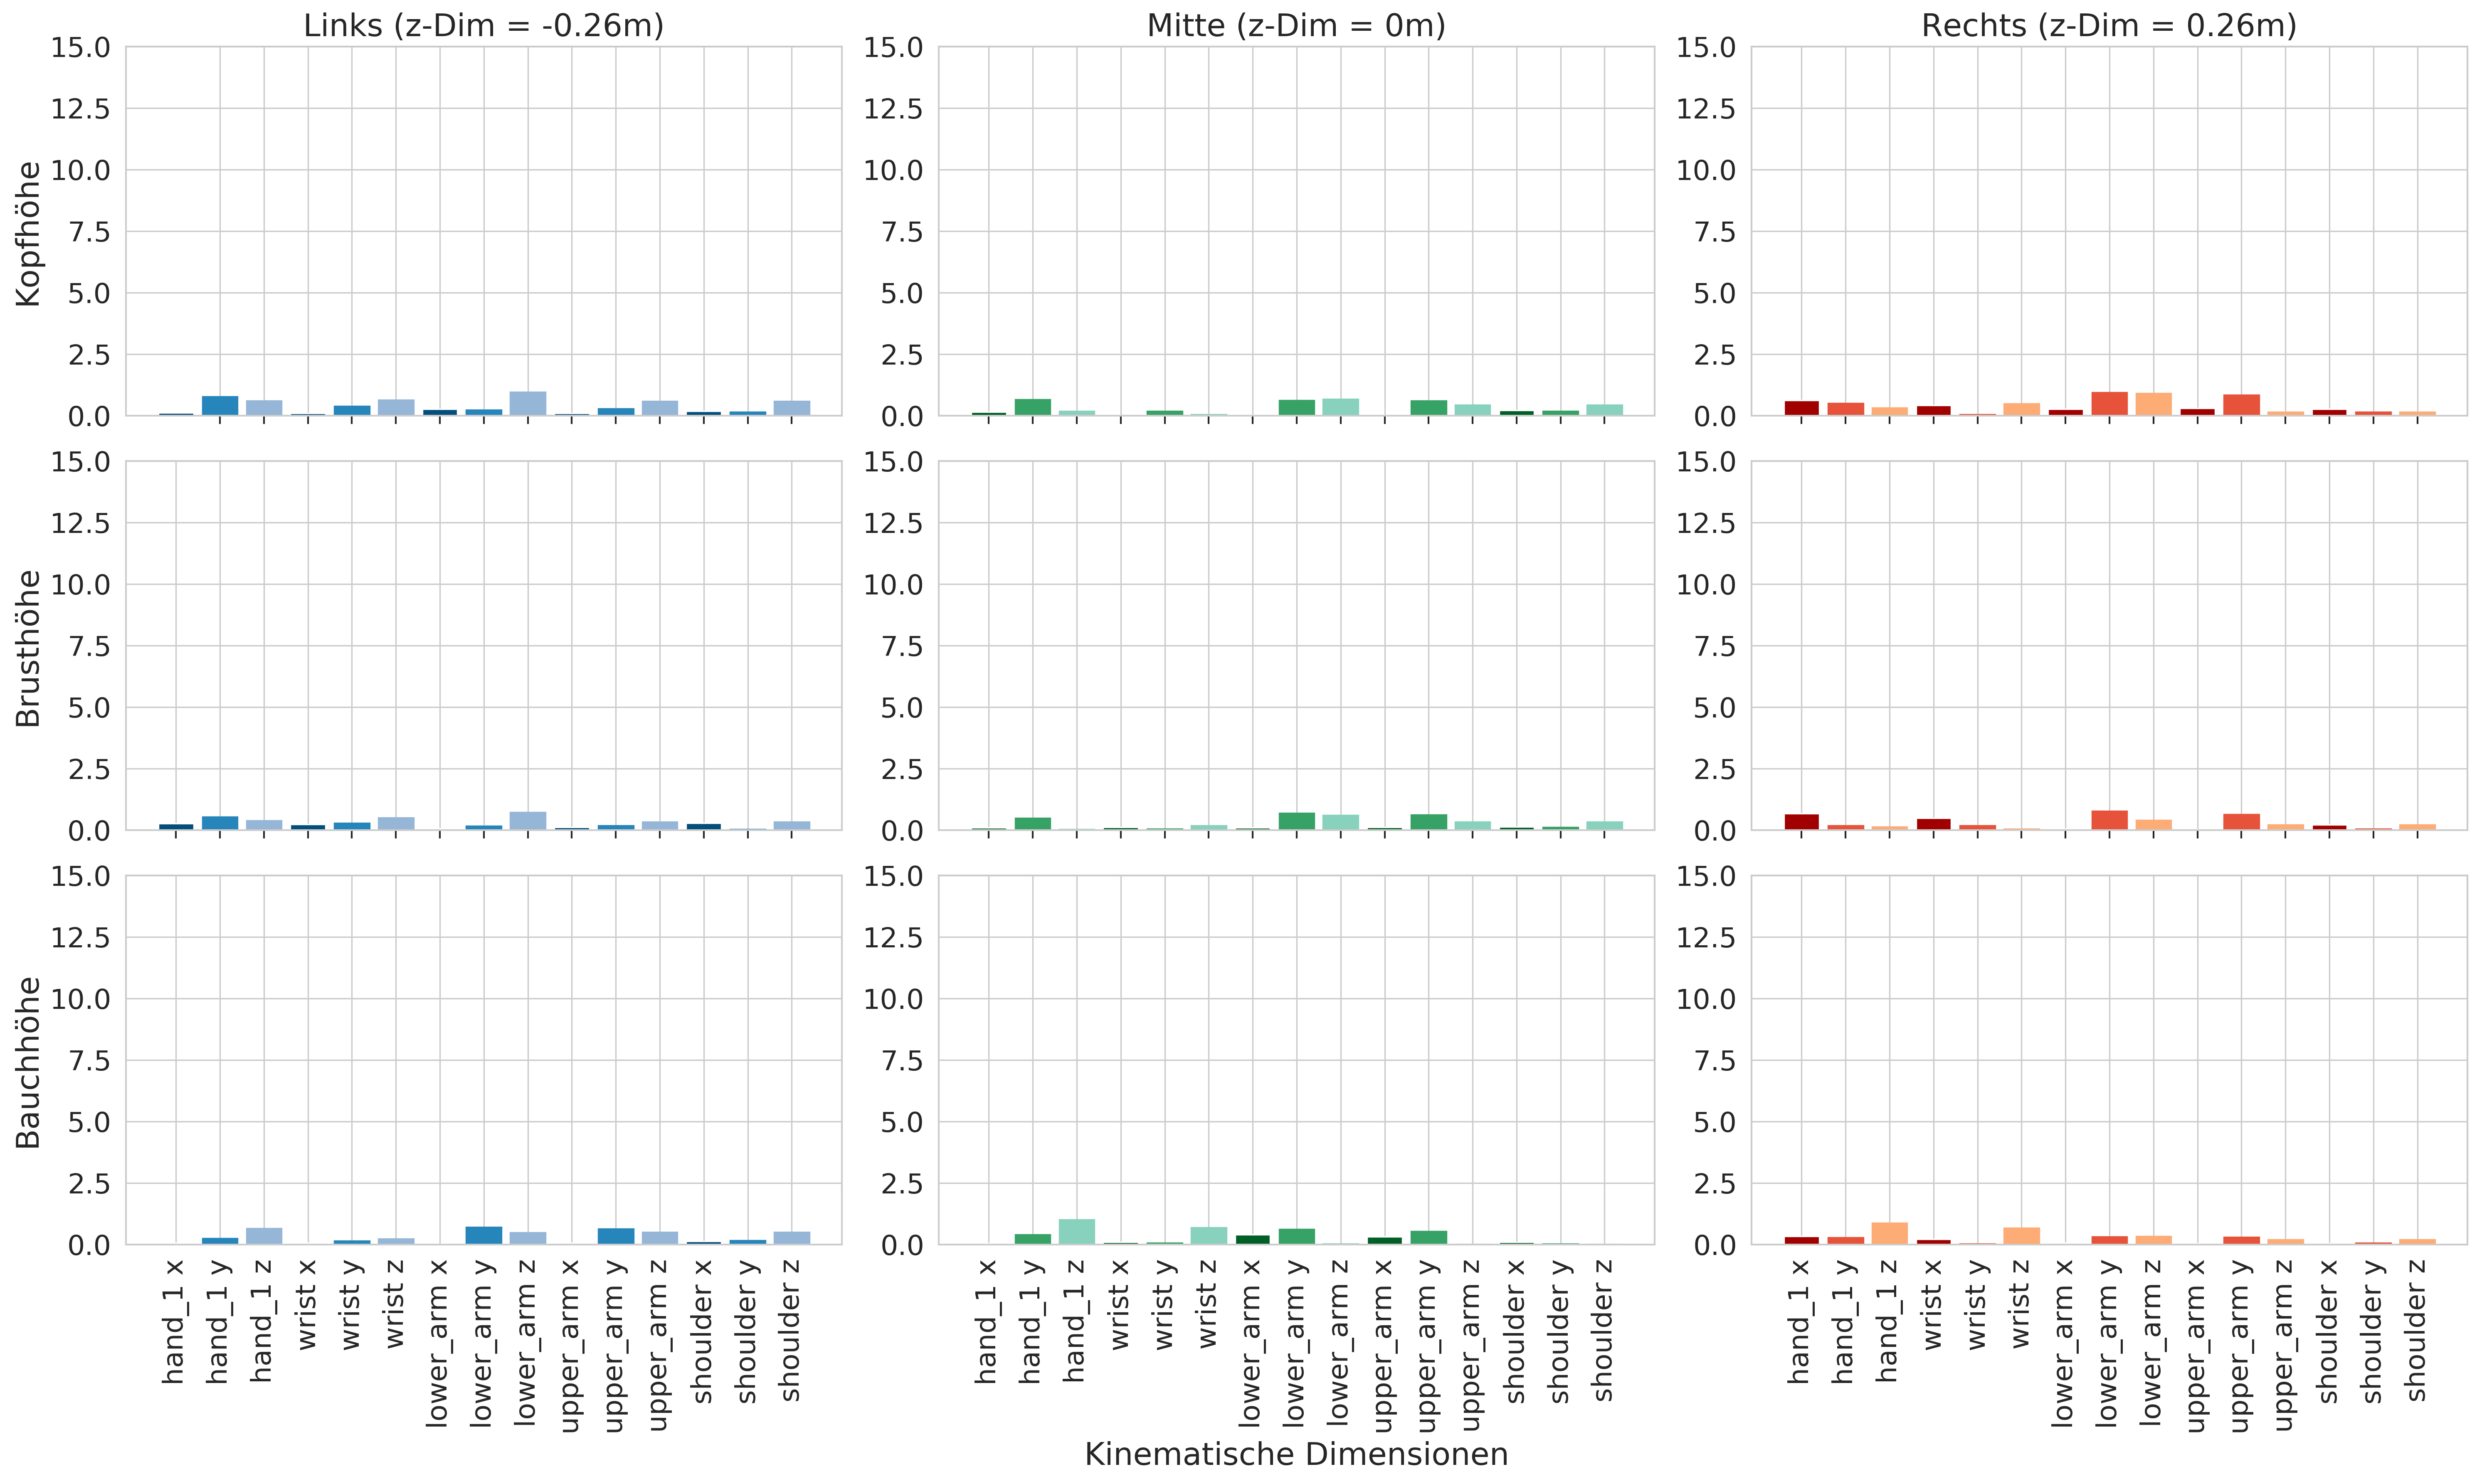

Subject Done!!
sub-02
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r2_singular_values.png
sub-02_r2_singular_values.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_m1_singular_var_explained.png
sub-02_m1_singular_var_explained.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_m1_singular_values.png
sub-02_m1_singular_values.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r3__left_model_evidence.png
sub-02_r3__left_model_evidence.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_m2__left_v1.png
sub-02_m2__left_v1.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r2__left_vaf.png
sub-02_r2__left_vaf.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r3_singular_var_explained.png
sub-02_r3_singular_var_explained.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r2__left_model_evidence.png
sub-02_r2__left_model_evidence.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02_r1__right_vaf.png
sub-02_r1__right_vaf.png
/home/michael/Desktop/model_evd/1H/sub-02/sub-02

/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "
/home/michael/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/_

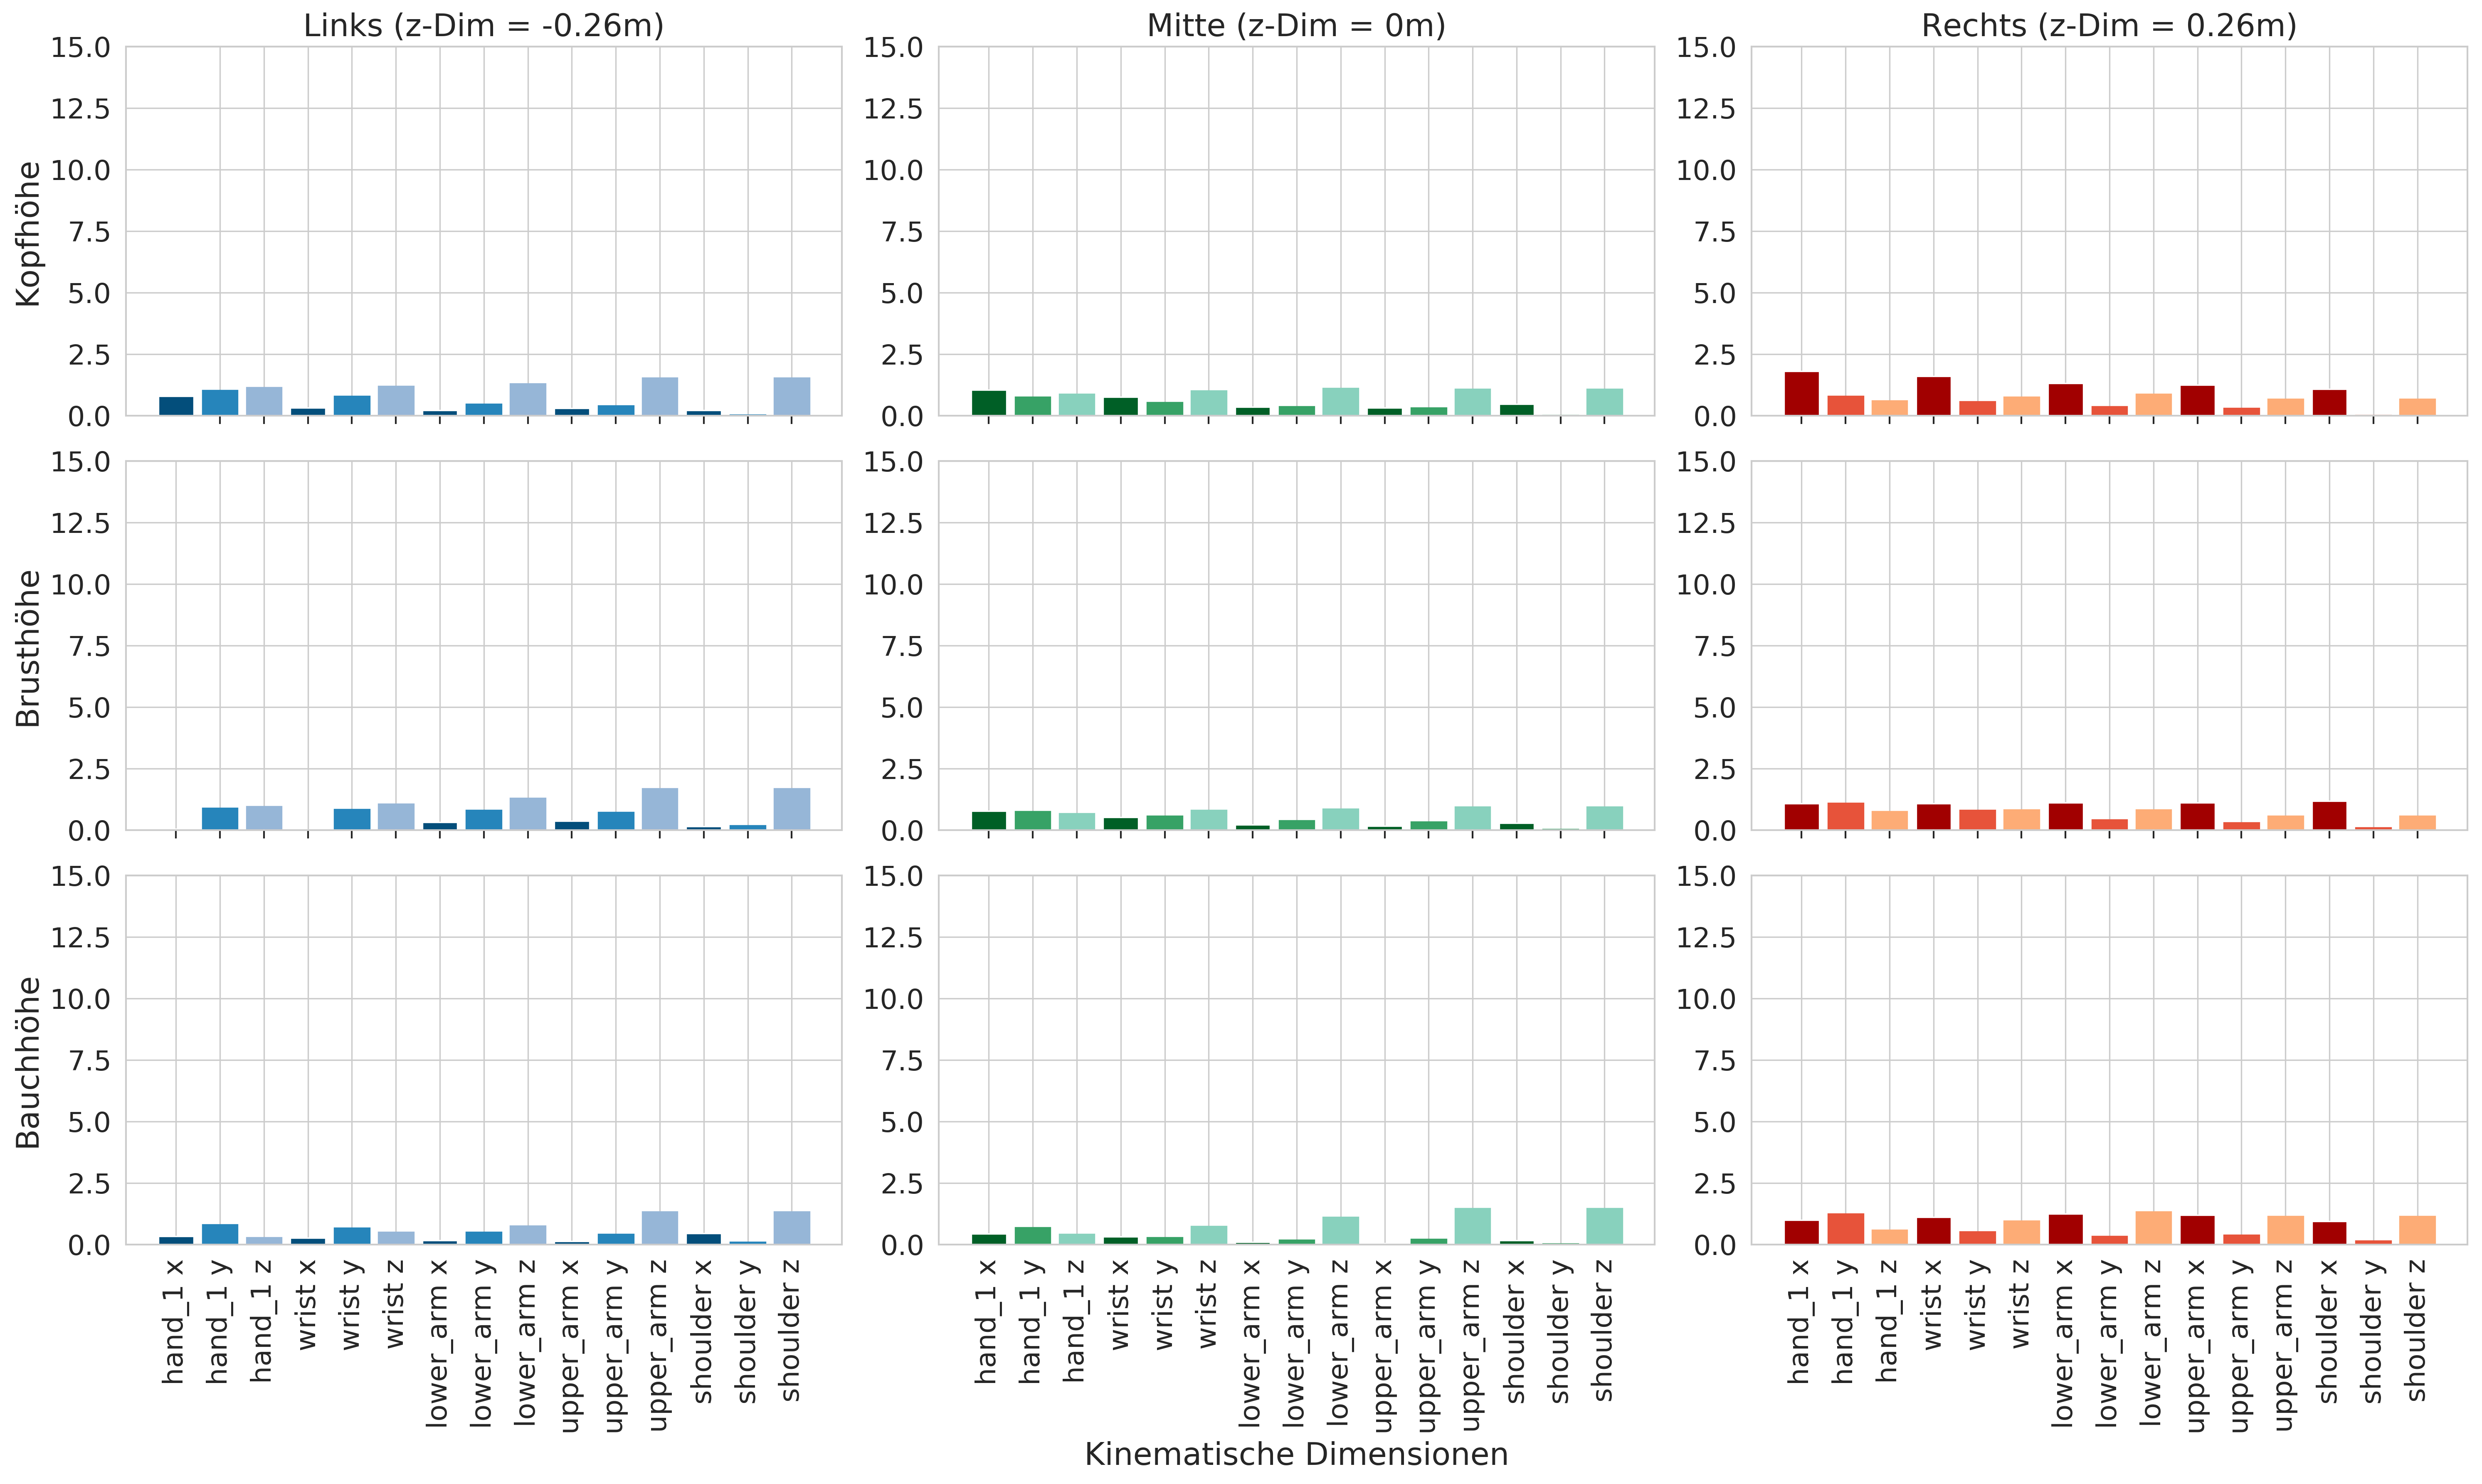

Subject Done!!


In [124]:
dir_ = '/home/michael/Desktop/model_evd/1H/*'
df_r1 = pd.DataFrame()
subjects_info = pd.DataFrame()
labels = ['hand_1 x', 'hand_1 y','hand_1 z','wrist x','wrist y','wrist z','lower_arm x','lower_arm y','lower_arm z','upper_arm x', 'upper_arm y','upper_arm z', 'shoulder x','shoulder y', 'shoulder z']

path = '/home/michael/Desktop/model_evd/1H/group_level/'

for subject in (glob.glob(dir_)):
#     print(subject)
    subject_id = subject.split('/')[-1]
    print(subject_id)


    for filename in (glob.glob(subject+'/*')):
        print(filename)
        pos_name = filename.split('/')[-1]
        print(pos_name)

        for x in (glob.glob(filename+'/*')):
            if x.split('_')[-2] == 'VT' and x.split('_')[-1] == 'matrix.csv':
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                vt = pd.read_csv(x, encoding='utf-8')
                vt = np.abs(np.array(vt))

            elif x.split('_')[-2] == 'sigma' and x.split('_')[-1] == 'matrix.csv':
                print('!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!')
                s = pd.read_csv(x, encoding='utf-8')
                s = np.array(s)

        S = np.diag(s.flatten())
        svt = S.dot(vt)
        pc = svt[2]
        if pos_name == 'r1':
            r1_vt = pc
        elif pos_name == 'r2':
            r2_vt = pc
        elif pos_name == 'r3':
            r3_vt = pc
        elif pos_name == 'm1':
            m1_vt = pc
        elif pos_name == 'm2':
            m2_vt = pc
        elif pos_name == 'm3':
            m3_vt = pc
        elif pos_name == 'l1':
            l1_vt = pc
        elif pos_name == 'l2':
            l2_vt = pc
#             print('l2')
        elif pos_name == 'l3':
            l3_vt = pc
#             print('here')

    fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 12))
    ax[0][2].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off'  # labels along the bottom edge are off))
    )
    ax[0][1].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off'  # labels along the bottom edge are off))
    )   
    ax[0][0].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off'  # labels along the bottom edge are off))
    )   
    ax[1][2].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off'  # labels along the bottom edge are off))
    )   
    ax[1][1].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off'  # labels along the bottom edge are off))
    )   
    ax[1][0].tick_params(
       axis='x',          # changes apply to the x-axis
       which='both',      # both major and minor ticks are affected
       bottom='on',      # ticks along the bottom edge are off
       top='off',         # ticks along the top edge are off
       labelbottom='off'  # labels along the bottom edge are off))
    )   

    ax[0][2].bar(range(len(r1_vt)),r1_vt,color=reds[10])
    ax[0][2].set_xticks(np.arange(0, (len(r1_vt)), 1))
    ax[0][2].set_ylim(-0,15)
    ax[0][2].set_title('Rechts (z-Dim = 0.26m)')

    ax[0][1].bar(range(len(m1_vt)),m1_vt,color=greens[10])
    ax[0][1].set_ylim(-0,15)
    ax[0][1].set_xticks(np.arange(0, (len(m1_vt)), 1))
    ax[0][1].set_title('Mitte (z-Dim = 0m)')


    ax[0][0].bar(range(len(l1_vt)),l1_vt,color=blues[10])
    ax[0][0].set_ylim(-0,15)
    ax[0][0].set_xticks(np.arange(1, (len(l1_vt)), 1))
    ax[0][0].set_title('Links (z-Dim = -0.26m)')
    ax[0][0].set_ylabel('Kopfhöhe')

    ax[1][2].bar(range(len(r2_vt)),r2_vt,color=reds[10])
    ax[1][2].set_ylim(-0,15)
    ax[1][2].set_xticks(np.arange(0, (len(r2_vt)), 1))


    ax[1][1].bar(range(len(m2_vt)),m2_vt,color=greens[10])
    ax[1][1].set_ylim(-0,15)
    ax[1][1].set_xticks(np.arange(0, (len(m2_vt)), 1))


    ax[1][0].bar(range(len(l2_vt)),l2_vt,color=blues[10])
    ax[1][0].set_ylim(-0,15)
    ax[1][0].set_xticks(np.arange(0, (len(l2_vt)), 1))
    ax[1][0].set_ylabel('Brusthöhe')



    ax[2][2].bar(range(len(r3_vt)),r3_vt,color=reds[10])
    ax[2][2].set_ylim(-0,15)
    ax[2][2].set_xticks(np.arange(0, (len(r3_vt)), 1))
    ax[2][2].set_xticklabels(labels, rotation=90)


    ax[2][1].bar(range(len(m3_vt)),m3_vt,color=greens[10])
    ax[2][1].set_ylim(0,15)
    ax[2][1].set_xticks(np.arange(0, (len(m3_vt)), 1))
    ax[2][1].set_xticklabels(labels, rotation=90)


    ax[2][0].bar(range(len(l3_vt)),l3_vt,color=blues[10])
    ax[2][0].set_ylim(-0,15)
    ax[2][0].set_xticks(np.arange(0, (len(l3_vt)), 1))

    # COlor bars
    ax[2][0].set_xticklabels(labels, rotation=90)
    ax[2][0].get_children()[1].set_color(blues[7]) 
    ax[2][0].get_children()[2].set_color(blues[4]) 
    ax[2][0].get_children()[4].set_color(blues[7]) 
    ax[2][0].get_children()[5].set_color(blues[4]) 
    ax[2][0].get_children()[7].set_color(blues[7]) 
    ax[2][0].get_children()[8].set_color(blues[4]) 
    ax[2][0].get_children()[10].set_color(blues[7]) 
    ax[2][0].get_children()[11].set_color(blues[4]) 
    ax[2][0].get_children()[13].set_color(blues[7]) 
    ax[2][0].get_children()[14].set_color(blues[4]) 


    ax[1][0].get_children()[1].set_color(blues[7]) 
    ax[1][0].get_children()[2].set_color(blues[4]) 
    ax[1][0].get_children()[4].set_color(blues[7]) 
    ax[1][0].get_children()[5].set_color(blues[4]) 
    ax[1][0].get_children()[7].set_color(blues[7]) 
    ax[1][0].get_children()[8].set_color(blues[4]) 
    ax[1][0].get_children()[10].set_color(blues[7]) 
    ax[1][0].get_children()[11].set_color(blues[4]) 
    ax[1][0].get_children()[13].set_color(blues[7]) 
    ax[1][0].get_children()[14].set_color(blues[4]) 



    ax[0][0].get_children()[1].set_color(blues[7]) 
    ax[0][0].get_children()[2].set_color(blues[4]) 
    ax[0][0].get_children()[4].set_color(blues[7]) 
    ax[0][0].get_children()[5].set_color(blues[4]) 
    ax[0][0].get_children()[7].set_color(blues[7]) 
    ax[0][0].get_children()[8].set_color(blues[4]) 
    ax[0][0].get_children()[10].set_color(blues[7]) 
    ax[0][0].get_children()[11].set_color(blues[4]) 
    ax[0][0].get_children()[13].set_color(blues[7]) 
    ax[0][0].get_children()[14].set_color(blues[4]) 



    # COlor bars
    ax[2][1].set_xticklabels(labels, rotation=90)
    ax[2][1].get_children()[1].set_color(greens[7]) 
    ax[2][1].get_children()[2].set_color(greens[4]) 
    ax[2][1].get_children()[4].set_color(greens[7]) 
    ax[2][1].get_children()[5].set_color(greens[4]) 
    ax[2][1].get_children()[7].set_color(greens[7]) 
    ax[2][1].get_children()[8].set_color(greens[4]) 
    ax[2][1].get_children()[10].set_color(greens[7]) 
    ax[2][1].get_children()[11].set_color(greens[4]) 
    ax[2][1].get_children()[13].set_color(greens[7]) 
    ax[2][1].get_children()[14].set_color(greens[4]) 


    ax[1][1].get_children()[1].set_color(greens[7]) 
    ax[1][1].get_children()[2].set_color(greens[4]) 
    ax[1][1].get_children()[4].set_color(greens[7]) 
    ax[1][1].get_children()[5].set_color(greens[4]) 
    ax[1][1].get_children()[7].set_color(greens[7]) 
    ax[1][1].get_children()[8].set_color(greens[4]) 
    ax[1][1].get_children()[10].set_color(greens[7]) 
    ax[1][1].get_children()[11].set_color(greens[4]) 
    ax[1][1].get_children()[13].set_color(greens[7]) 
    ax[1][1].get_children()[14].set_color(greens[4]) 



    ax[0][1].get_children()[1].set_color(greens[7]) 
    ax[0][1].get_children()[2].set_color(greens[4]) 
    ax[0][1].get_children()[4].set_color(greens[7]) 
    ax[0][1].get_children()[5].set_color(greens[4]) 
    ax[0][1].get_children()[7].set_color(greens[7]) 
    ax[0][1].get_children()[8].set_color(greens[4]) 
    ax[0][1].get_children()[10].set_color(greens[7]) 
    ax[0][1].get_children()[11].set_color(greens[4]) 
    ax[0][1].get_children()[13].set_color(greens[7]) 
    ax[0][1].get_children()[14].set_color(greens[4]) 



    # COlor bars
    ax[2][2].set_xticklabels(labels, rotation=90)
    ax[2][2].get_children()[1].set_color(reds[7]) 
    ax[2][2].get_children()[2].set_color(reds[4]) 
    ax[2][2].get_children()[4].set_color(reds[7]) 
    ax[2][2].get_children()[5].set_color(reds[4]) 
    ax[2][2].get_children()[7].set_color(reds[7]) 
    ax[2][2].get_children()[8].set_color(reds[4]) 
    ax[2][2].get_children()[10].set_color(reds[7]) 
    ax[2][2].get_children()[11].set_color(reds[4]) 
    ax[2][2].get_children()[13].set_color(reds[7]) 
    ax[2][2].get_children()[14].set_color(reds[4]) 


    ax[1][2].get_children()[1].set_color(reds[7]) 
    ax[1][2].get_children()[2].set_color(reds[4]) 
    ax[1][2].get_children()[4].set_color(reds[7]) 
    ax[1][2].get_children()[5].set_color(reds[4]) 
    ax[1][2].get_children()[7].set_color(reds[7]) 
    ax[1][2].get_children()[8].set_color(reds[4]) 
    ax[1][2].get_children()[10].set_color(reds[7]) 
    ax[1][2].get_children()[11].set_color(reds[4]) 
    ax[1][2].get_children()[13].set_color(reds[7]) 
    ax[1][2].get_children()[14].set_color(reds[4]) 



    ax[0][2].get_children()[1].set_color(reds[7]) 
    ax[0][2].get_children()[2].set_color(reds[4]) 
    ax[0][2].get_children()[4].set_color(reds[7]) 
    ax[0][2].get_children()[5].set_color(reds[4]) 
    ax[0][2].get_children()[7].set_color(reds[7]) 
    ax[0][2].get_children()[8].set_color(reds[4]) 
    ax[0][2].get_children()[10].set_color(reds[7]) 
    ax[0][2].get_children()[11].set_color(reds[4]) 
    ax[0][2].get_children()[13].set_color(reds[7]) 
    ax[0][2].get_children()[14].set_color(reds[4]) 

#     labels, rotation=70
    ax[2][0].set_ylabel('Bauchhöhe')
#     ax[2][0].legend(labels)
    ax[2][1].set_xlabel('Kinematische Dimensionen')


    fig.savefig(path+'/pcs/pc3/'+subject_id+'_pc3.png')
    plt.show()

    print('Subject Done!!')